In [306]:
require(ggplot2)
require(reshape2)
require(lme4)
require(car)

EAch bag at a site, you calculate the proportion that survived. 




Wet weight, look at difference in wet weight for those that survived change in wet weight for each of the oysters, treat that as subsample, average change in weight for all the oysters in there. 
Lowering power by using subsamples but you are increasing power for detecting prevalence/survivorship/etc. 
Then do an ANOVA. 


## How many of them have dry Ratio of dry to wet weight??


WEre there differences in survivorship? If you have clams, does it increase oyster survival that they were eaten? No.

Were there differences in Condition? Between sites?


From an aquaculture standpoint, we don't care why they died. 
For my initial effort, how many are going to have high disease?

If there are huge differences in site, then you could have two classes of sites, or is there 


for an ANOVA, you don't want to lump across sites. 
First, look at the interaction with site, is there a significant interaction? 
SITExDENSITYxDIVERSITY if that's significant, then 


Look at how many survived

look at how the change in wet weight. 

Don't throw any replicates out.

don't condition on survival
Yes/NO there were oysters that made it, all have some survivorship

basic frequency tables. In each bag, were there oysters that were infected, where are the glaring holes. There is no information on x y and z. Start at the bag level. at a coarse resolution are there patterns that are popping out. 

RFTM calculate the proportion of oysters that are infected. Prevalence conditioned on survivorship and not conditioned on survivorship run an anova on percents? calculate prevalence based off of how many went in and how many were infection. ANOVA on proportion using denominator as starting number. proportion of initial population that is infected. So denominator is number that you would have done rftm on if all had survived. Whats the proportion thats infected of initial population. 

## Plot hobo data, ysi data--what are the differences in sites?


## is there a relationship between presence of perkinsus and weight



Set up an experiment in DOOM? 
Both?
How do we pay for all of it? 
How big of an effect size?

In [307]:
d=read.csv("~/Documents/DE/DE_DATA.csv")
f=read.csv("~/Documents/DE/DE_FIELD_DATA.csv")

In [308]:
d$Treatment=paste0(d$Density, d$Diversity)

Remove dead or missing samples

In [309]:
d=d[!d$POST_DEAD_ALIVE=="DEAD",]
d=d[!d$POST_DEAD_ALIVE=="MISSING",]
d=d[!d$POST_DEAD_ALIVE=="PREDATION",]

In [310]:
d=d[!d$Treatment=="VHIGHLOW",]

Calculate percent of total oysters (and rftm oysters) that survived for each bag

HH:6, 3
HL: 18, 9
LH: 3, 2
LL: 9, 5

In [311]:
numbers=table(d$Species, d$Color, d$Treatment, d$Site)
numbers=as.data.frame.table(numbers, response=Species)
colnames(numbers)=c("Species", "Color", "Treatment", "Site", "Number")
numbers=dcast(numbers, Treatment+Site+Color~Species)

numbers$CVmor=ifelse(numbers$Treatment=='HIGHHIGH', 100-((numbers$CV/6)*100),
    ifelse(numbers$Treatment=='HIGHLOW', 100-((numbers$CV/18)*100), 
      ifelse(numbers$Treatment=='LOWHIGH', 100-((numbers$CV/3)*100),
          ifelse(numbers$Treatment=='LOWLOW', 100-((numbers$CV/9)*100), 100-((numbers$CV/18)*100))
             )
           )
       )   


numbers$CVsur=ifelse(numbers$Treatment=='HIGHHIGH', (numbers$CV/6)*100,
    ifelse(numbers$Treatment=='HIGHLOW', (numbers$CV/18)*100, 
      ifelse(numbers$Treatment=='LOWHIGH', (numbers$CV/3)*100,
          ifelse(numbers$Treatment=='LOWLOW', (numbers$CV/9)*100, (numbers$CV/18)*100)
             )
           )
       )
          
#numbers$TotalDensity=numbers$CV+numbers$GD+numbers$MM
#numbers$PerCV=(numbers$CV/numbers$TotalDensity)*100

Using Number as value column: use value.var to override.


In [241]:
head(numbers)

Treatment,Site,Color,CV,GD,MM,CVmor,CVsur
HIGHHIGH,NW,B,5,6,1,16.66667,83.33333
HIGHHIGH,NW,P,5,6,4,16.66667,83.33333
HIGHHIGH,NW,R,4,6,2,33.33333,66.66667
HIGHHIGH,NW,Y,6,6,1,0.00000,100.00000
HIGHHIGH,OY,B,6,5,0,0.00000,100.00000
HIGHHIGH,OY,P,6,6,0,0.00000,100.00000


In [312]:
dc=merge(d, numbers, by=c("Treatment", "Site", "Color"))

In [313]:
dc[c(10:13, 16:19, 21:25)]=apply(dc[c(10:13, 16:19, 21:25)], 2, as.character)
dc[c(10:13, 16:19, 21:25)]=apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric)

Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”

In [314]:
dc$Height_change=dc$Height_post-dc$Height_pre
dc$Weight_change=dc$Weight_post-dc$Weight_pre
dc$Length_change=dc$Length_post-dc$Length_pre
dc$Width_change=dc$Width_post-dc$Width_pre
dc$Dry_weight=dc$Dry_weight_final-dc$Dry_Weight_plate

Separate by species, separate out oysters sampled for RFTM

In [431]:
cv=dc[dc$Species=="CV",]
gd=dc[dc$Species=="GD",]
mm=dc[dc$Species=="MM",]

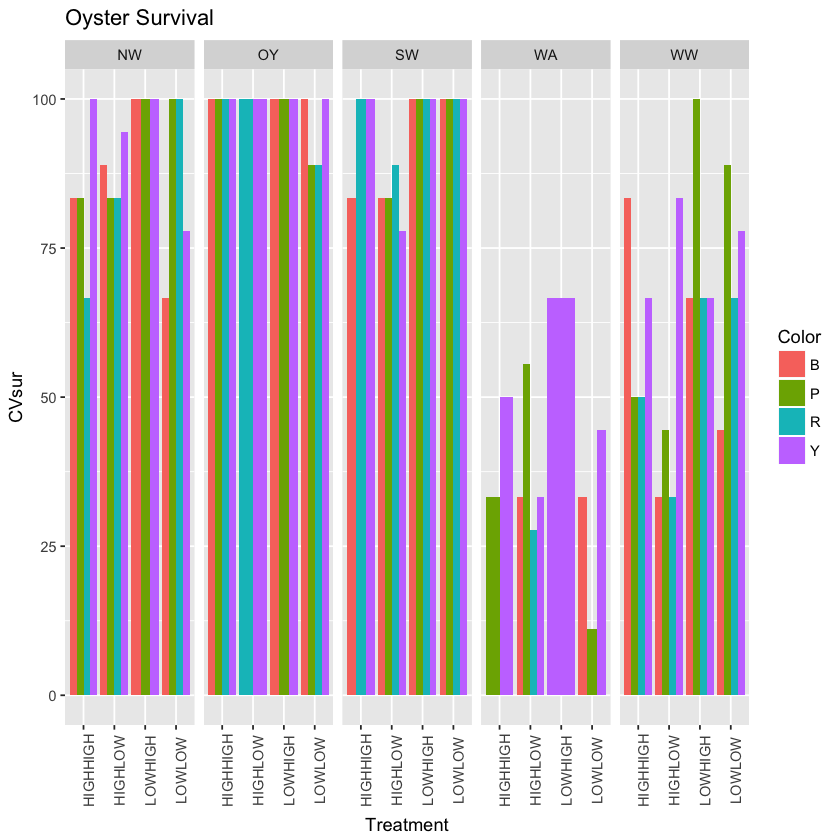

In [316]:
ggplot(cv, aes(x = Treatment, y = CVsur, fill=Color)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+theme(axis.text.x = element_text(angle = 90))+ggtitle("Oyster Survival")

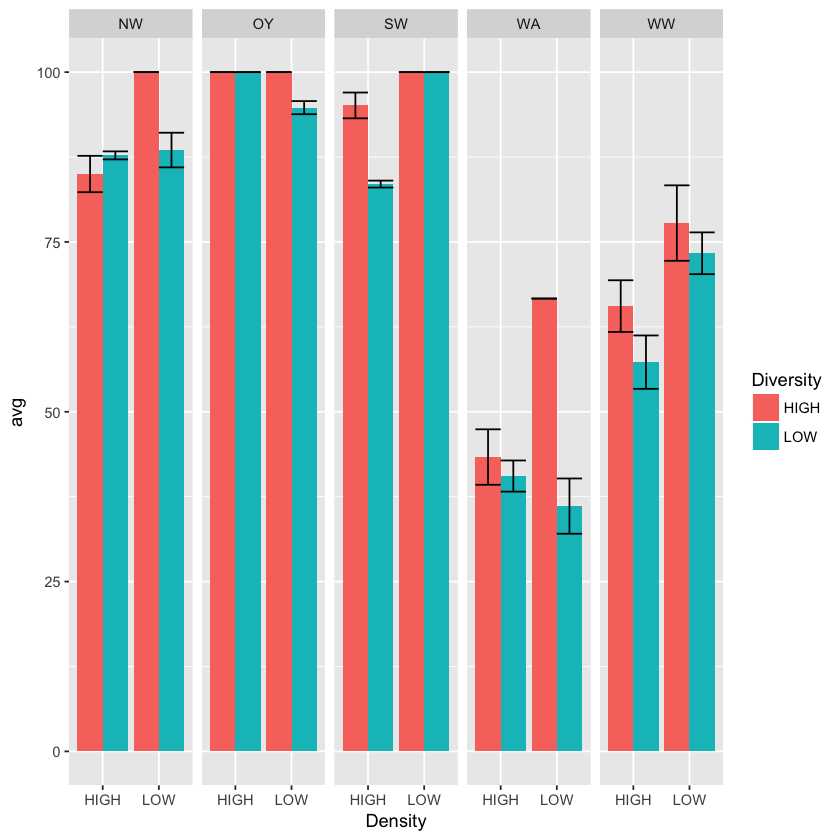

In [406]:
CVsurival=aggregate(CVsur~Density+Diversity+Site, data=cv, FUN=multi)
CVsurival$avg=CVsurival$CVsur[,1]
CVsurival$sd=CVsurival$CVsur[,2]
CVsurival=CVsurival[-4]
ggplot(CVsurival, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [427]:
cv=cv[!cv$Site=="WW",]

In [434]:
cv$transCVsur=asin(sqrt(cv$CVsur/100)) 

In [435]:
surv_results= lm(transCVsur ~ Density*Diversity*Site, data=cv[!cv$Site=="WW" & !cv$Site=="WA",])
summary(surv_results)


Call:
lm(formula = transCVsur ~ Density * Diversity * Site, data = cv[!cv$Site == 
    "WW" & !cv$Site == "WA", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38551 -0.06977  0.00000  0.01093  0.33336 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.23743    0.02853  43.368  < 2e-16 ***
DensityLOW                      0.33336    0.05122   6.509 2.73e-10 ***
DiversityLOW                   -0.01741    0.03275  -0.531 0.595456    
SiteOY                          0.33336    0.03863   8.629 2.44e-16 ***
SiteSW                          0.20968    0.04210   4.981 1.01e-06 ***
DensityLOW:DiversityLOW        -0.21256    0.05837  -3.642 0.000313 ***
DensityLOW:SiteOY              -0.33336    0.07149  -4.663 4.49e-06 ***
DensityLOW:SiteSW              -0.20968    0.07027  -2.984 0.003054 ** 
DiversityLOW:SiteOY             0.01741    0.04694   0.371 0.711019    
DiversityLOW:SiteSW            -0.27434    0.

In [436]:
anova(surv_results)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Density,1,2.0415238330,2.0415238330,125.37601196,5.647950e-25
Diversity,1,1.3648422073,1.3648422073,83.81899351,5.230964e-18
Site,2,2.6212749784,1.3106374892,80.49012158,2.490817e-29
Density:Diversity,1,0.0006620907,0.0006620907,0.04066095,8.403147e-01
Density:Site,2,2.7965992383,1.3982996191,85.87371205,6.728225e-31
Diversity:Site,2,0.1684896552,0.0842448276,5.17372383,6.119134e-03
Density:Diversity:Site,2,0.7907976382,0.3953988191,24.28261001,1.394459e-10
Residuals,339,5.5200079232,0.0162832092,NA,NA


In [425]:
print(surv_results)




Call:
lm(formula = transCVsur ~ Density * Diversity * Site, data = cv)

Coefficients:
                   (Intercept)                      DensityLOW  
                       1.23743                         0.33336  
                  DiversityLOW                          SiteOY  
                      -0.01741                         0.33336  
                        SiteSW                          SiteWW  
                       0.20968                        -0.28510  
       DensityLOW:DiversityLOW               DensityLOW:SiteOY  
                      -0.21256                        -0.33336  
             DensityLOW:SiteSW               DensityLOW:SiteWW  
                      -0.20968                        -0.12522  
           DiversityLOW:SiteOY             DiversityLOW:SiteSW  
                       0.01741                        -0.27434  
           DiversityLOW:SiteWW  DensityLOW:DiversityLOW:SiteOY  
                      -0.06414                         0.05264  
Den

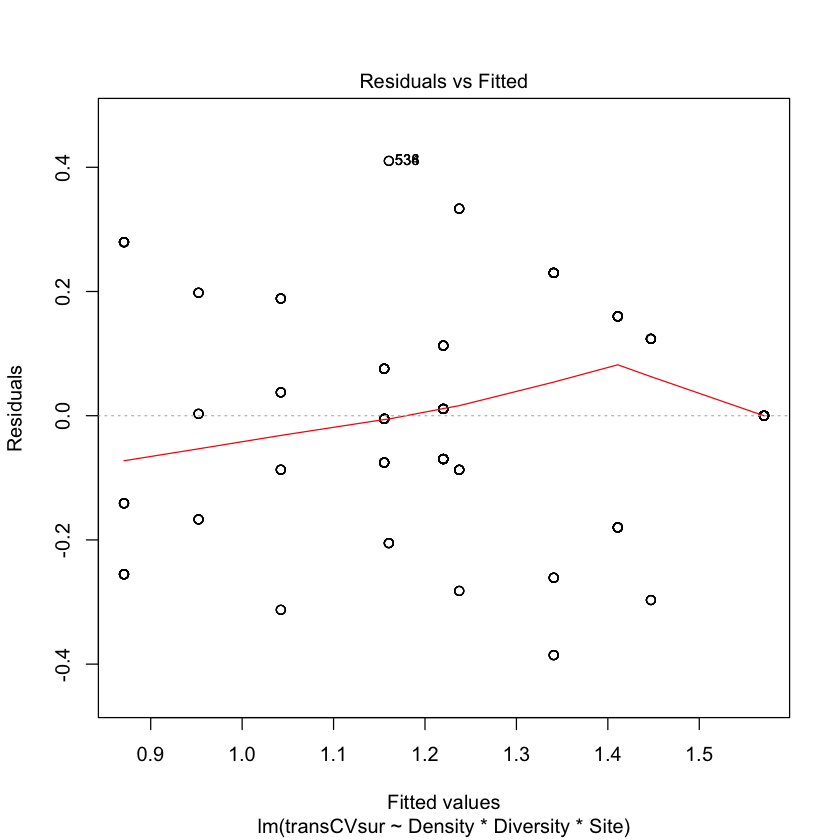

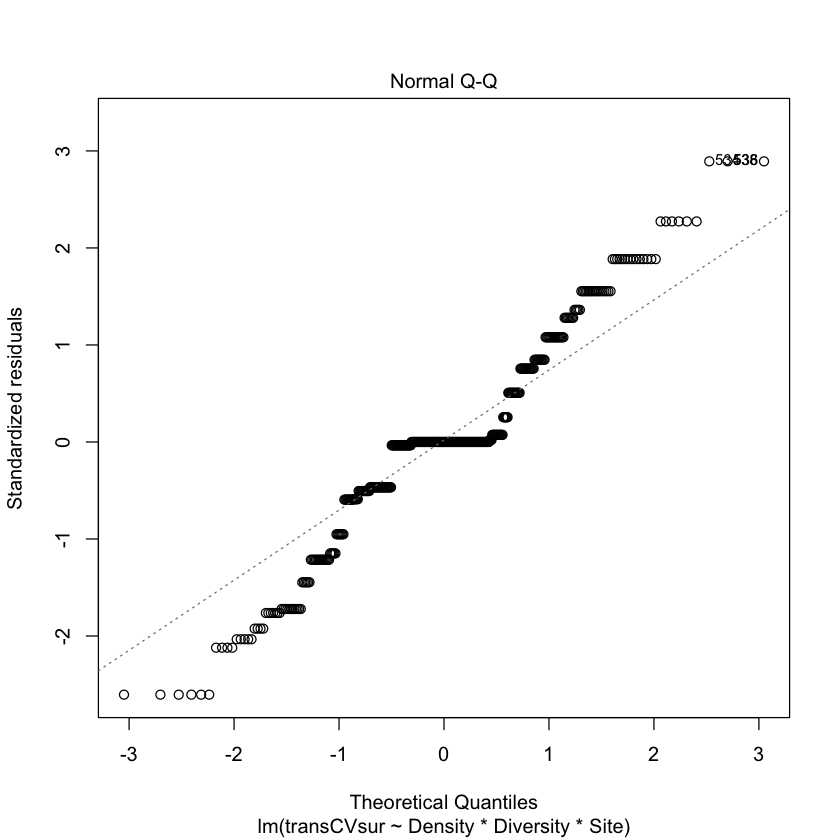

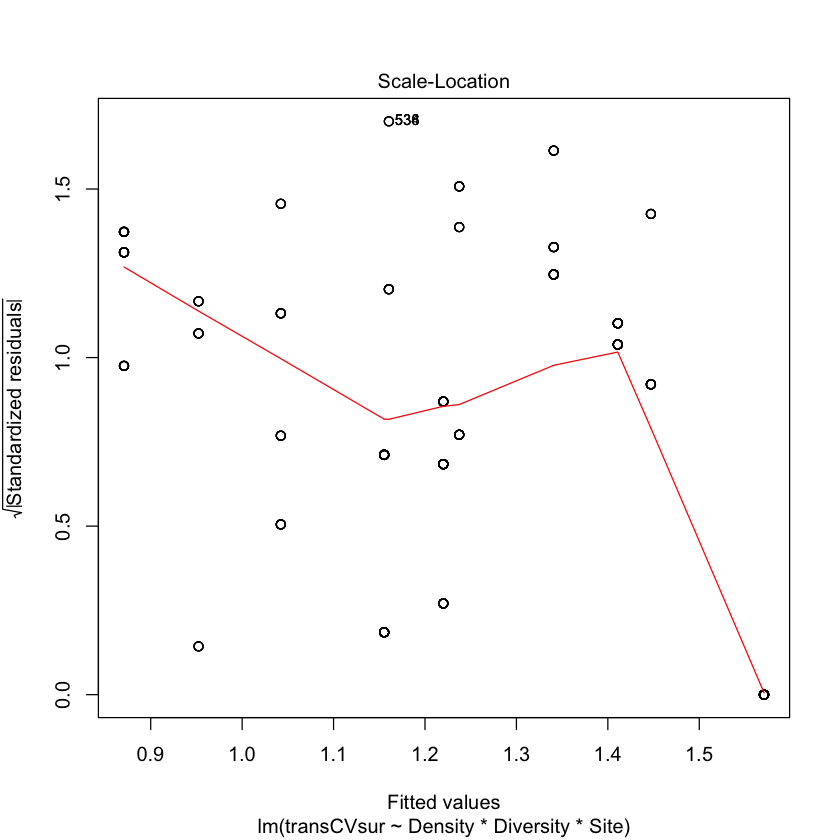

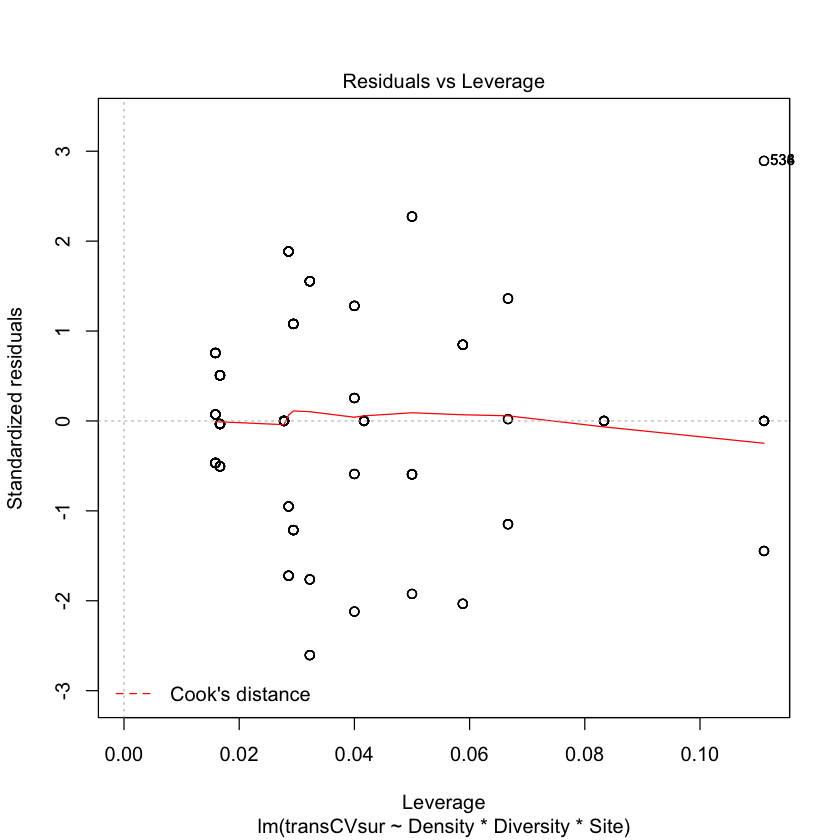

In [426]:
plot(surv_results)

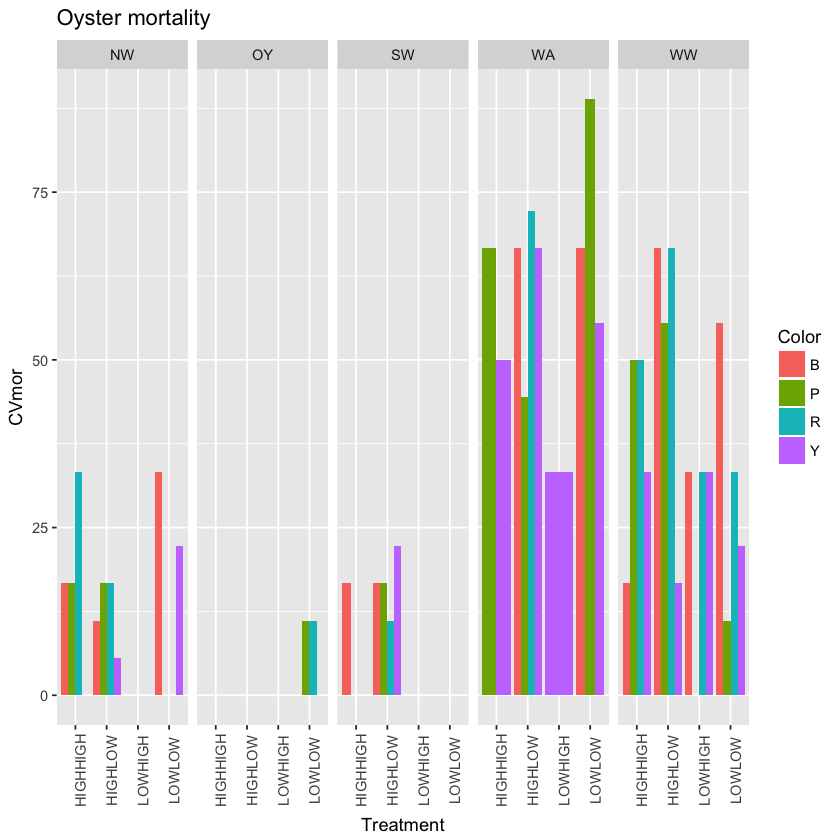

In [317]:
ggplot(cv, aes(x = Treatment, y = CVmor, fill=Color)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+theme(axis.text.x = element_text(angle = 90))+ggtitle("Oyster mortality")

Warning message:
“Removed 19 rows containing missing values (geom_bar).”

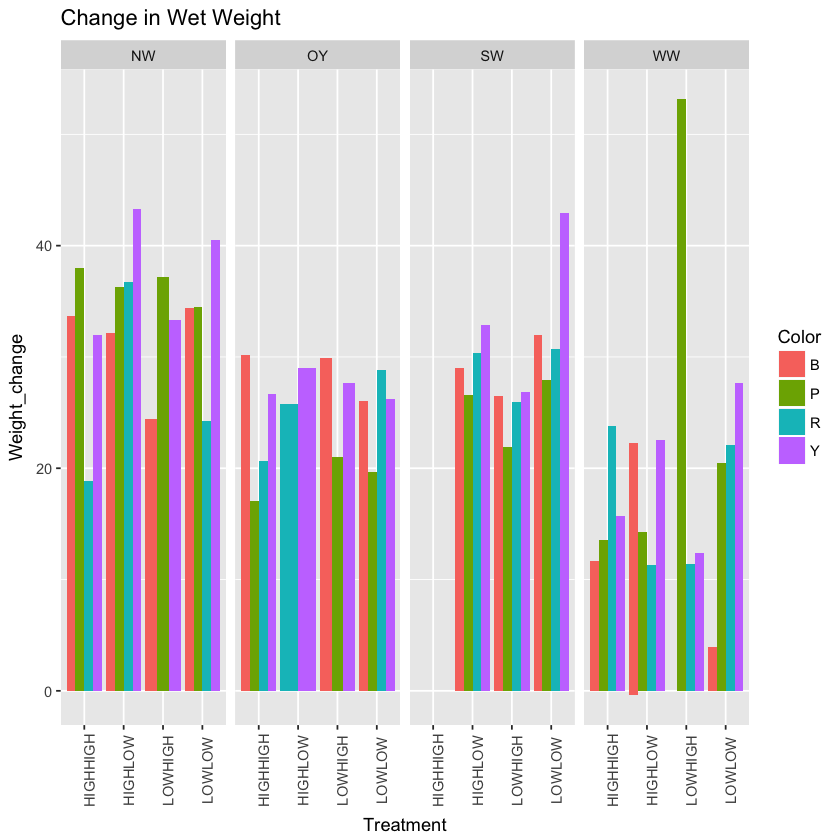

In [319]:
ggplot(cv, aes(x = Treatment, y = Weight_change, fill=Color)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+theme(axis.text.x = element_text(angle = 90))+ggtitle("Change in Wet Weight")

Change in wet weight by treatment

In [320]:
multi = function(x) {
      c(avg = mean(x, na.rm=TRUE), se = sd(x, na.rm=TRUE)/sqrt(length(x)) )
}

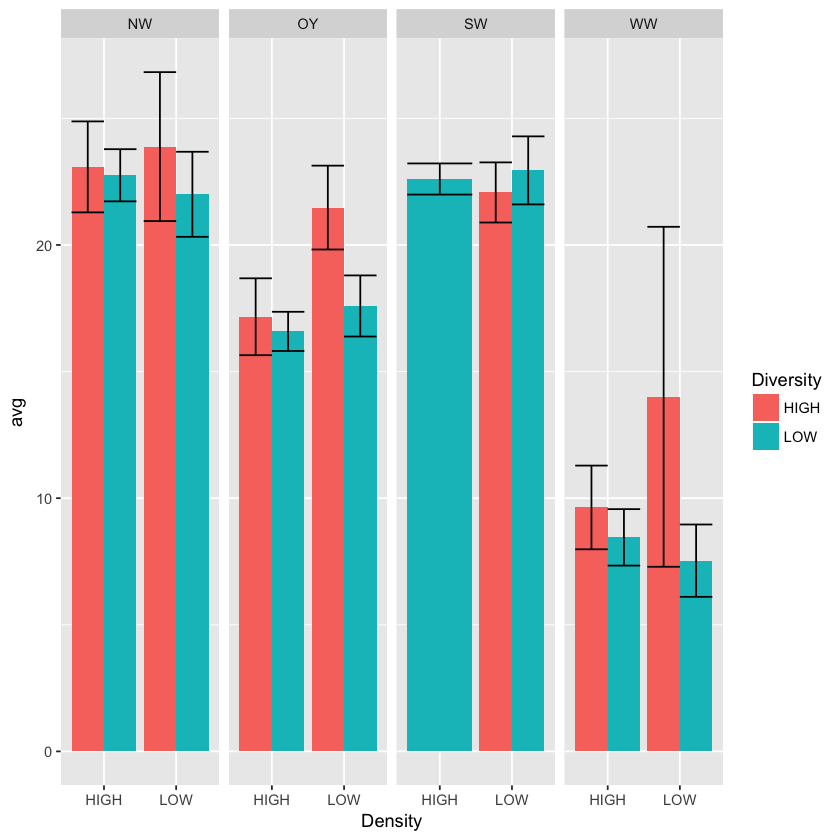

In [321]:
Weightchange=aggregate(Weight_change~Density+Diversity+Site, data=cv, FUN=multi)
Weightchange$avg=Weightchange$Weight_change[,1]
Weightchange$sd=Weightchange$Weight_change[,2]
Weightchange=Weightchange[-4]
ggplot(Weightchange, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [440]:
Weightchangeb=aggregate(Weight_change~Color+Density+Diversity+Site, data=cv[!cv$Site=="WA",], FUN=mean)
wc_results= lm(Weight_change ~ Density*Diversity*Site, data=Weightchangeb)
summary(wc_results)


Call:
lm(formula = Weight_change ~ Density * Diversity * Site, data = Weightchangeb)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5780 -2.0382 -0.8718  1.5702  8.1481 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     22.5480     2.0665  10.911 1.47e-13 ***
DensityLOW                       1.3364     3.1566   0.423 0.674282    
DiversityLOW                     0.1838     2.9224   0.063 0.950159    
SiteOY                          -5.3830     2.9224  -1.842 0.072902 .  
SiteSW                          -2.5909     5.2005  -0.498 0.621062    
SiteWW                         -12.3862     2.9224  -4.238 0.000129 ***
DensityLOW:DiversityLOW         -1.7839     4.3017  -0.415 0.680578    
DensityLOW:SiteOY                2.9752     4.4641   0.666 0.508928    
DensityLOW:SiteSW                0.7807     4.1329   0.189 0.851135    
DensityLOW:SiteWW                1.4573     

In [438]:
anova(wc_results)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Density,1,65.298293,65.298293,3.6279400,6.322078e-02
Diversity,1,30.859879,30.859879,1.7145592,1.970414e-01
Site,4,2184.479124,546.119781,30.3421379,2.911254e-12
Density:Diversity,1,7.281053,7.281053,0.4045316,5.279800e-01
Density:Site,4,22.903852,5.725963,0.3181316,8.643572e-01
Diversity:Site,4,83.877358,20.969339,1.1650459,3.388869e-01
Density:Diversity:Site,3,16.259769,5.419923,0.3011282,8.243980e-01
Residuals,45,809.942603,17.998725,NA,NA


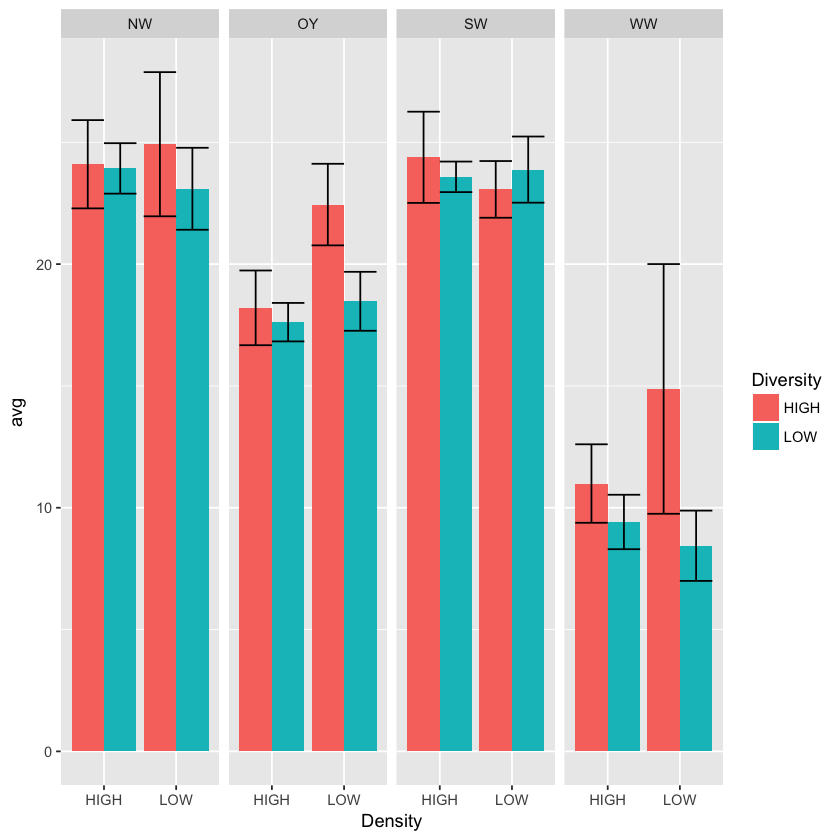

In [323]:
Weightpost=aggregate(Weight_post~Density+Diversity+Site, data=cv, FUN=multi)
Weightpost$avg=Weightpost$Weight_post[,1]
Weightpost$sd=Weightpost$Weight_post[,2]
Weightpost=Weightpost[-4]
ggplot(Weightpost, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [324]:
Weightpostb=aggregate(Weight_post~Color+Density+Diversity+Site, data=cv, FUN=mean)
wp_results= aov(Weight_post ~ Density*Diversity*Site, data=Weightpostb)
summary(wp_results)

                       Df Sum Sq Mean Sq F value   Pr(>F)    
Density                 1    5.6     5.6   0.328    0.570    
Diversity               1   25.6    25.6   1.494    0.228    
Site                    3 1788.6   596.2  34.737 1.46e-11 ***
Density:Diversity       1   15.1    15.1   0.878    0.354    
Density:Site            3   15.6     5.2   0.302    0.824    
Diversity:Site          3   43.3    14.4   0.842    0.479    
Density:Diversity:Site  3   15.8     5.3   0.306    0.821    
Residuals              43  738.0    17.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Just looking at oysters taken for RFTM

In [325]:
cv=dc[dc$Species=="CV",]

In [326]:
dr=cv[cv$Genetics_Weight=="G"&!is.na(cv$RFTM_score),]

In [327]:
numbers=table(dr$Species, dr$Color, dr$Treatment, dr$Site)
numbers=as.data.frame.table(numbers, response=Species)
colnames(numbers)=c("Species", "Color", "Treatment", "Site", "Number")
numbers=dcast(numbers, Treatment+Site+Color~Species)

numbers$CVsurR=ifelse(numbers$Treatment=='HIGHHIGH', (numbers$CV/3)*100,
    ifelse(numbers$Treatment=='HIGHLOW', (numbers$CV/9)*100, 
      ifelse(numbers$Treatment=='LOWHIGH', (numbers$CV/2)*100,
          ifelse(numbers$Treatment=='LOWLOW', (numbers$CV/5)*100, (numbers$CV/18)*100)
             )
           )
       )
          
numbers$CVmorR=ifelse(numbers$Treatment=='HIGHHIGH', 100-((numbers$CV/3)*100),
    ifelse(numbers$Treatment=='HIGHLOW', 100-((numbers$CV/9)*100), 
      ifelse(numbers$Treatment=='LOWHIGH', 100-((numbers$CV/2)*100),
          ifelse(numbers$Treatment=='LOWLOW', 100-((numbers$CV/5)*100), 100-((numbers$CV/18)*100))
             )
           )
       )   
cvRFTM=merge(dr, numbers, by=c("Treatment", "Site", "Color"))

Using Number as value column: use value.var to override.


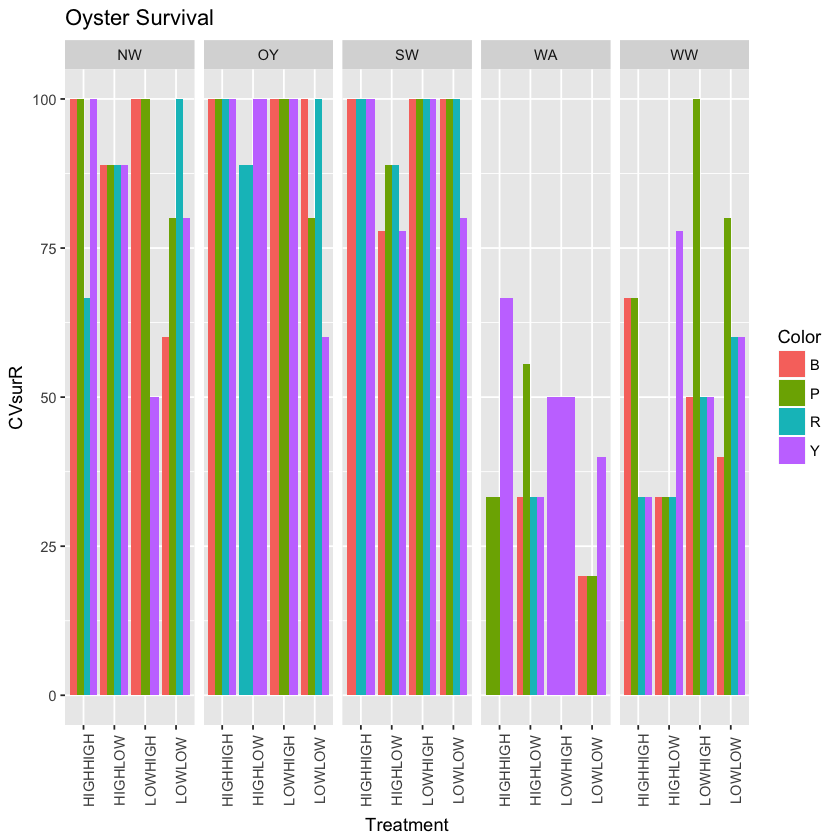

In [328]:
ggplot(cvRFTM, aes(x = Treatment, y = CVsurR, fill=Color)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+theme(axis.text.x = element_text(angle = 90))+ggtitle("Oyster Survival")

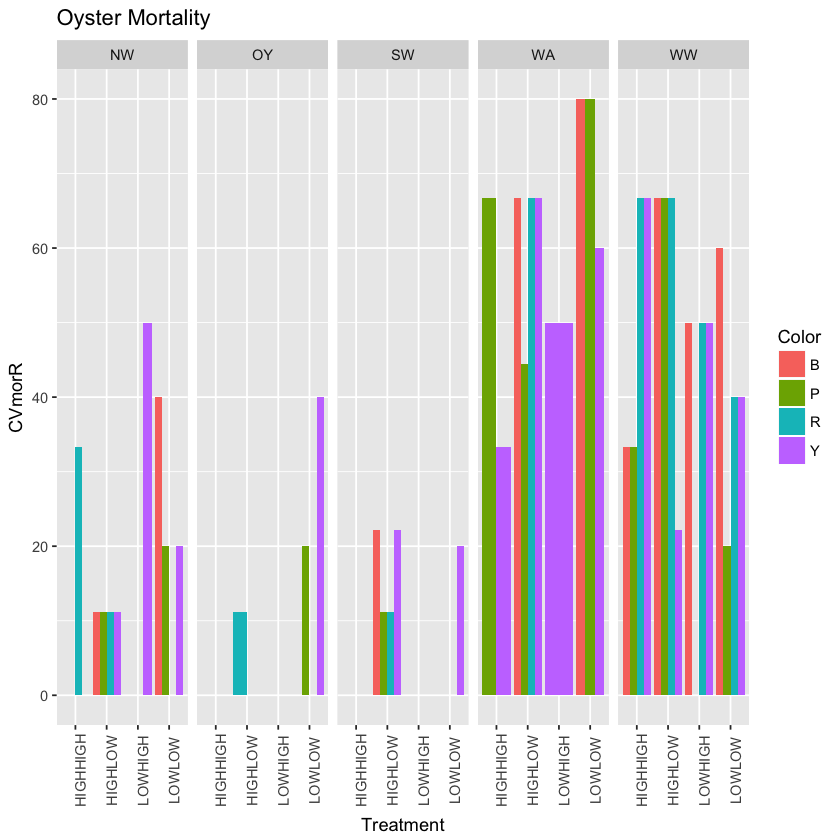

In [329]:
ggplot(cvRFTM, aes(x = Treatment, y = CVmorR, fill=Color)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+theme(axis.text.x = element_text(angle = 90))+ggtitle("Oyster Mortality")

In [330]:
cvRFTM=cvRFTM[!cvRFTM$Site=="WA",]
cvRFTM$Site=factor(cvRFTM$Site)

In [331]:
cvRFTM$RFTM_prev=ifelse(cvRFTM$RFTM_score>0, 1, 0)

In [332]:
bprev=as.data.frame.table(table(cvRFTM$RFTM_prev, cvRFTM$Color, cvRFTM$Treatment, cvRFTM$Site))

In [333]:
colnames(bprev)=c("Prev", "Color", "Treatment", "Site", "Freq")

In [334]:
bprev=dcast(bprev, Treatment+Site+Color~Prev, value.var="Freq") 

In [335]:
colnames(bprev)=c("Treatment", "Site", "Color", "zero","one")

In [336]:
bprev$bagprev=ifelse(bprev$one>0, 1, 0)

In [337]:
bp=as.data.frame.table(table(bprev$bagprev, bprev$Treatment, bprev$Site))
colnames(bp)=c("Prev", "Treatment", "Site", "Freq")

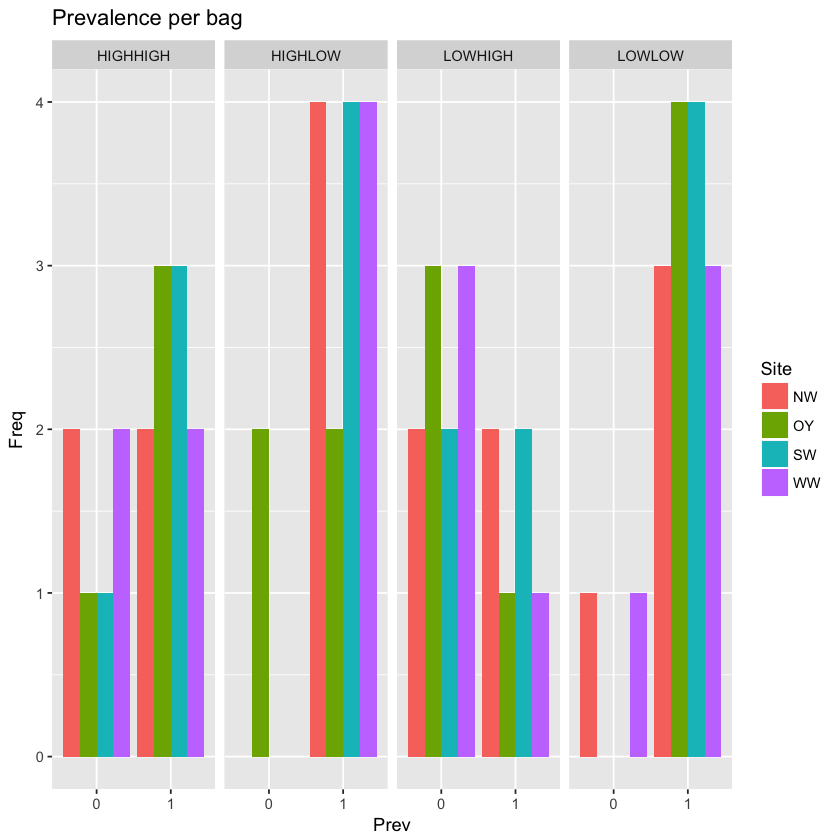

In [342]:
ggplot(bp, aes(x = Prev, y = Freq, fill=Site)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Treatment)+ggtitle("Prevalence per bag")

But, is this just because of differences in numbers?

In [441]:
prevalence=with(cvRFTM, tapply(RFTM_prev, list(Density, Diversity, Site, Color),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalence=na.omit(as.data.frame.table(prevalence, response=RFTM_prev))
colnames(prevalence)=c("Density", "Diversity","Site","Color", "RFTM_prev")

In [443]:
prev_results= lm(RFTM_prev ~ Density*Diversity*Site, data=prevalence[!prevalence$Site=="WA",])
summary(prev_results)


Call:
lm(formula = RFTM_prev ~ Density * Diversity * Site, data = prevalence[!prevalence$Site == 
    "WA", ])

Residuals:
   Min     1Q Median     3Q    Max 
-68.75 -18.30   0.00  23.75  62.50 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)  
(Intercept)                       20.83      17.42   1.196   0.2384  
DensityLOW                        45.83      26.62   1.722   0.0923 .
DiversityLOW                      35.42      24.64   1.437   0.1579  
SiteOY                            29.17      24.64   1.184   0.2431  
SiteSW                            45.83      26.62   1.722   0.0923 .
SiteWW                            16.67      24.64   0.676   0.5024  
DensityLOW:DiversityLOW          -33.33      36.27  -0.919   0.3632  
DensityLOW:SiteOY                -79.17      37.64  -2.103   0.0413 *
DensityLOW:SiteSW                -62.50      37.64  -1.660   0.1041  
DensityLOW:SiteWW                -70.83      36.27  -1.953   0.0574 .
DiversityLOW:SiteOY

In [444]:
anova(prev_results)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Density,1,137.50005,137.50005,0.11321638,0.7381482
Diversity,1,3408.89910,3408.89910,2.80685860,0.1011203
Site,3,2574.74135,858.24712,0.70667340,0.5532995
Density:Diversity,1,98.62886,98.62886,0.08121017,0.7770322
Density:Site,3,6314.41444,2104.80481,1.73307843,0.1744424
Diversity:Site,3,3154.35047,1051.45016,0.86575514,0.4661896
Density:Diversity:Site,3,1920.13512,640.04504,0.52700766,0.6661022
Residuals,43,52223.03005,1214.48907,NA,NA


# Look at prevalence with each site as the replicate, so percentage across all bags, the site


In [448]:
prevalenceS=with(cvRFTM, tapply(RFTM_prev, list(Density, Diversity, Site),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalenceS=na.omit(as.data.frame.table(prevalenceS, response=RFTM_prev))
colnames(prevalenceS)=c("Density", "Diversity","Site","RFTM_prev")

In [450]:
prevS_results= lm(RFTM_prev ~ Density*Diversity, data=prevalenceS[!prevalenceS$Site=="WA",])
summary(prevS_results)


Call:
lm(formula = RFTM_prev ~ Density * Diversity, data = prevalenceS[!prevalenceS$Site == 
    "WA", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-25.000 -12.255  -2.773  10.136  38.333 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)              42.0455    10.1450   4.144  0.00136 **
DensityLOW               -0.3788    14.3472  -0.026  0.97937   
DiversityLOW             12.9974    14.3472   0.906  0.38281   
DensityLOW:DiversityLOW   0.8958    20.2900   0.044  0.96551   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.29 on 12 degrees of freedom
Multiple R-squared:  0.1278,	Adjusted R-squared:  -0.09024 
F-statistic: 0.5862 on 3 and 12 DF,  p-value: 0.6355


In [451]:
anova(prevS_results)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Density,1,1.909246e-02,0.01909246,4.637641e-05,0.9946783
Diversity,1,7.231058e+02,723.10579173,1.756455e+00,0.2097472
Density:Diversity,1,8.023703e-01,0.80237029,1.948992e-03,0.9655130
Residuals,12,4.940218e+03,411.68482824,NA,NA


If we submit. WE learned how to do things differently, and we know we need more power. 

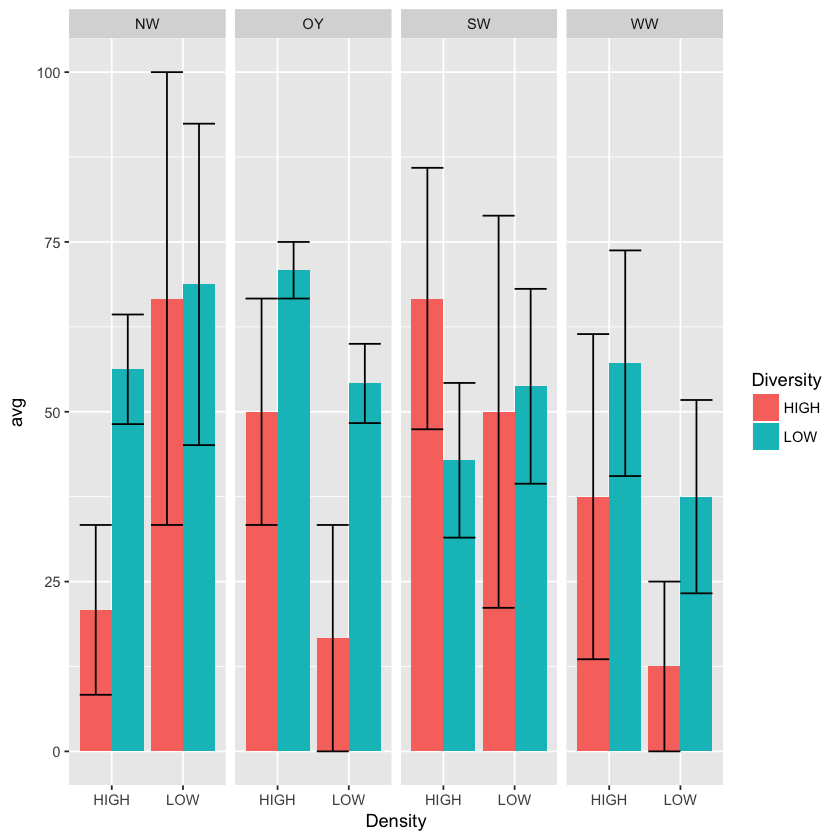

In [446]:
prevCV=aggregate(RFTM_prev~Density+Diversity+Site, data=prevalence, FUN=multi)
prevCV$avg=prevCV$RFTM_prev[,1]
prevCV$sd=prevCV$RFTM_prev[,2]
prevCV=prevCV[-4]
ggplot(prevCV, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

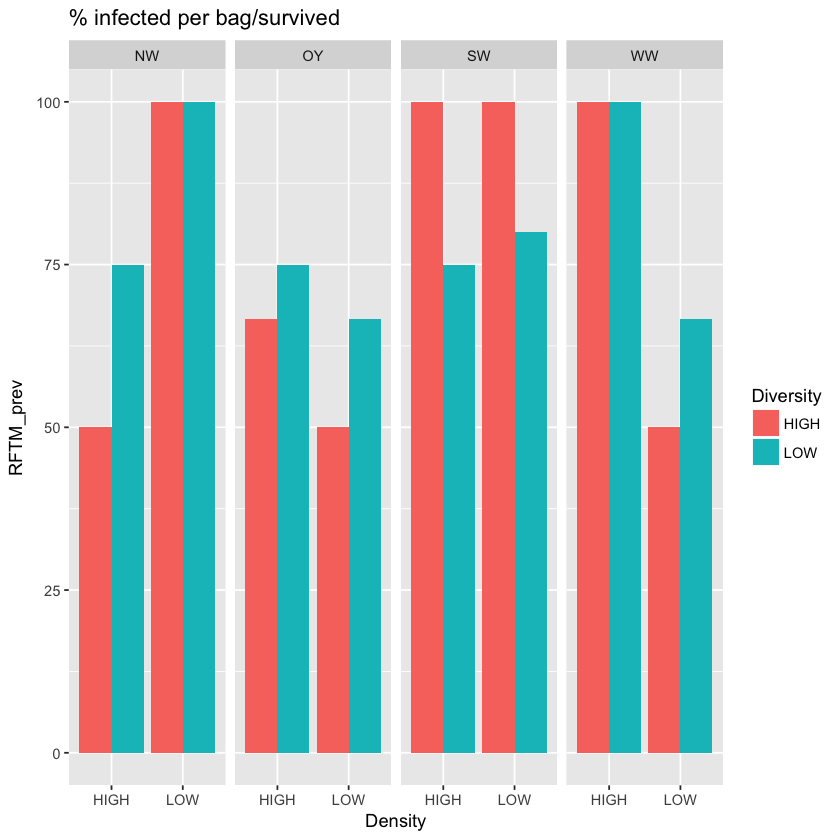

In [363]:
ggplot(prevalence, aes(x = Density, y = RFTM_prev, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+ggtitle("% infected per bag/survived")

In [356]:
prevsurvive=with(cvRFTM, tapply(RFTM_prev, list(Density, Diversity, Site, Color),  function(x) (sum(x>0, na.rm=TRUE))))
prevsurvive=na.omit(as.data.frame.table(prevsurvive, response=RFTM_prev))
colnames(prevsurvive)=c("Density", "Diversity","Site","Color", "RFTM_prev")

In [357]:
prevsurvive$RFTM_per=ifelse(prevsurvive$Density=='HIGH' & prevsurvive$Diversity=="HIGH", ((prevsurvive$RFTM_prev/3)*100),
    ifelse(prevsurvive$Density=='HIGH' & prevsurvive$Diversity=="LOW", ((prevsurvive$RFTM_prev/9)*100), 
      ifelse(prevsurvive$Density=='LOW' & prevsurvive$Diversity=="HIGH", ((prevsurvive$RFTM_prev/2)*100),
          ifelse(prevsurvive$Density=='LOW' & prevsurvive$Diversity=="LOW", ((prevsurvive$RFTM_prev/5)*100), ((prevsurvive$RFTM_prev/18)*100))
             )
           )
       )   

In [445]:
prevs_results= lm(RFTM_per ~ Density*Diversity*Site, data=prevsurvive)
summary(prevs_results)


Call:
lm(formula = RFTM_per ~ Density * Diversity * Site, data = prevsurvive)

Residuals:
   Min     1Q Median     3Q    Max 
-66.67 -15.28   0.00  16.67  50.00 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)                     1.667e+01  1.509e+01   1.104   0.2756  
DensityLOW                      5.000e+01  2.305e+01   2.169   0.0357 *
DiversityLOW                    3.333e+01  2.134e+01   1.562   0.1257  
SiteOY                          3.333e+01  2.134e+01   1.562   0.1257  
SiteSW                          5.000e+01  2.305e+01   2.169   0.0357 *
SiteWW                         -2.531e-14  2.134e+01   0.000   1.0000  
DensityLOW:DiversityLOW        -4.000e+01  3.142e+01  -1.273   0.2098  
DensityLOW:SiteOY              -8.333e+01  3.260e+01  -2.556   0.0142 *
DensityLOW:SiteSW              -6.667e+01  3.260e+01  -2.045   0.0470 *
DensityLOW:SiteWW              -5.417e+01  3.142e+01  -1.724   0.0919 .
DiversityLOW:SiteOY           

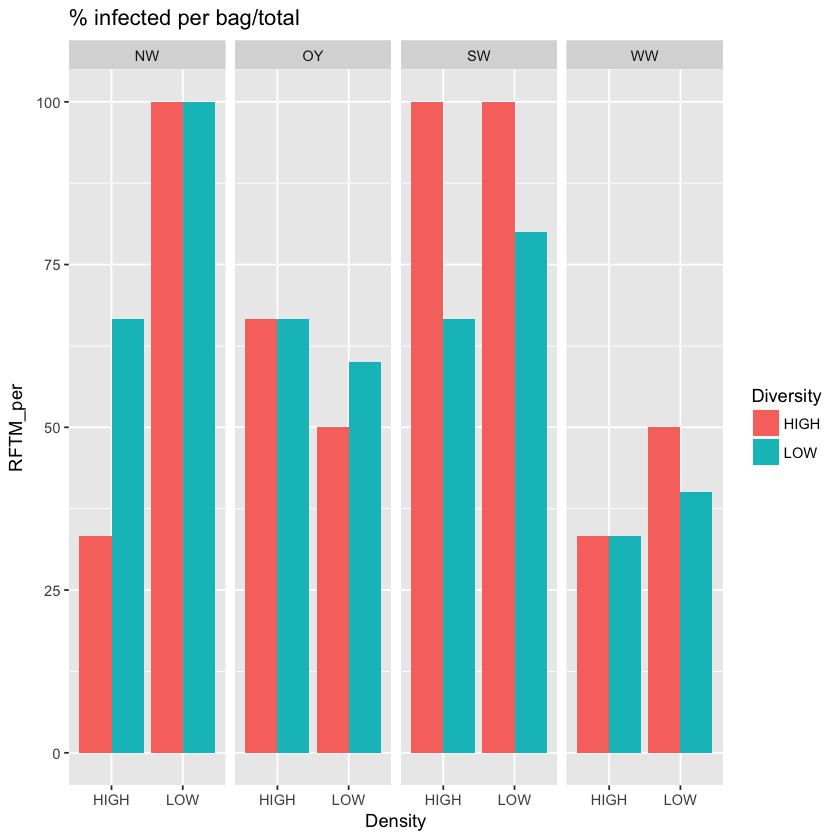

In [367]:
ggplot(prevsurvive, aes(x = Density, y = RFTM_per, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+ggtitle("% infected per bag/total")

In [396]:
WeightchangeR=aggregate(Weight_change~RFTM_prev+Treatment+Site, data=cvRFTM, FUN=multi)

In [397]:
WeightchangeR$avg=WeightchangeR$Weight_change[,1]
WeightchangeR$sd=WeightchangeR$Weight_change[,2]
WeightchangeR=WeightchangeR[-4]


In [401]:
WeightchangeR$RFTM_prev

[1] 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1

Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

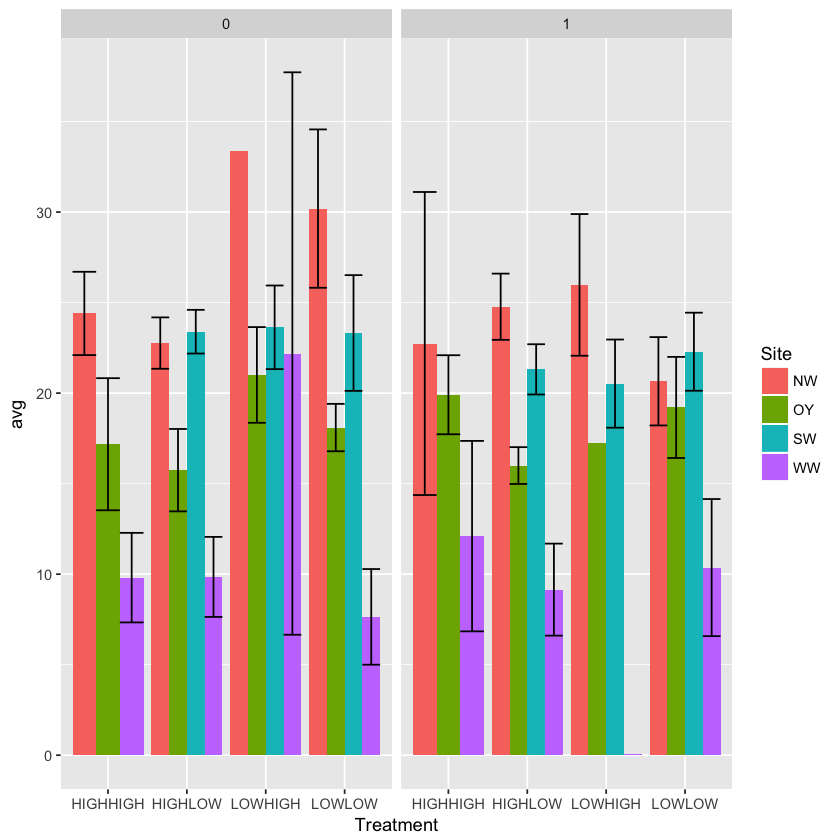

In [403]:
ggplot(WeightchangeR, aes(x = Treatment, y = avg, fill=Site)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~RFTM_prev)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [18]:
table(cvG$Color, cvG$Treatment, cvG$Site)

, ,  = NW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        3       8       2      3        0
  P        3       8       2      4        0
  R        2       8       0      5        0
  Y        3       8       1      4        0

, ,  = OY

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        3       0       2      5        0
  P        3       0       2      4        0
  R        3       9       0      5        0
  Y        3       9       2      4        0

, ,  = SW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        3       8       2      5        0
  P        0       8       2      5        0
  R        3       8       2      5        0
  Y        3       7       2      5        0

, ,  = WA

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        0       3       0      2        0
  P        1       5       0      1        0
  R        0       3       0      0        0
  Y        2       3       1      2        0

, ,  = WW

   
    HIGHHIGH HIGHLOW 

prevalence=presence/absence
From Malick and Breitburg 2016

Prevalence was calculated as the percentage of individuals
with infections out of the total number sampled,
and mean intensity as the average intensity
including individuals infected with P. marinus (i.e.
Mackin scores of 0.5 to 5; Soniat et al. 2006). 

In [20]:
NROW(cvRFTM)

[1] 274

How many oysters per bag?


In [21]:
table(cvRFTM$Color, cvRFTM$Treatment, cvRFTM$Site)

, ,  = NW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        3       8       2      3        0
  P        3       8       2      4        0
  R        2       8       0      5        0
  Y        3       8       1      4        0

, ,  = OY

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        3       0       2      5        0
  P        3       0       2      4        0
  R        3       8       0      5        0
  Y        3       9       2      3        0

, ,  = SW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        3       7       2      5        0
  P        0       8       2      5        0
  R        3       8       2      5        0
  Y        3       7       2      4        0

, ,  = WA

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        0       3       0      1        0
  P        1       5       0      1        0
  R        0       3       0      0        0
  Y        2       3       1      2        0

, ,  = WW

   
    HIGHHIGH HIGHLOW 

In [22]:
numbersr=table(cvRFTM$Color, cvRFTM$Treatment, cvRFTM$Site)
numbersr=as.data.frame.table(numbersr)
colnames(numbersr)=c( "Color", "Treatment", "Site", "NumCv")
cvRFTMnum=merge(cvRFTM, numbersr, by=c("Treatment", "Site", "Color"))

## Different levels of filtering

Level 1: (strict) HH 3, HL 7, LH 2, LL 4

Also try:
Level 2: (medium) HH 2 HL 3, LH 2, LL 3 

Level 3: (loose) HH 2, HL 2, LH 2, LL 2



In [23]:
cvRFTM1=cvRFTMnum[cvRFTMnum$Treatment=="HIGHHIGH" & cvRFTMnum$NumCv>=3|cvRFTMnum$Treatment=="HIGHLOW" & cvRFTMnum$NumCv>=7| cvRFTMnum$Treatment=="LOWHIGH" & cvRFTMnum$NumCv>=2|cvRFTMnum$Treatment=="LOWLOW" & cvRFTMnum$NumCv>=4,]

In [24]:
cvRFTM3=cvRFTMnum[cvRFTMnum$Treatment=="HIGHHIGH" & cvRFTMnum$NumCv>=2|cvRFTMnum$Treatment=="HIGHLOW" & cvRFTMnum$NumCv>=2| cvRFTMnum$Treatment=="LOWHIGH" & cvRFTMnum$NumCv>=2|cvRFTMnum$Treatment=="LOWLOW" & cvRFTMnum$NumCv>=2,]

In [25]:
table(cvRFTM1$Color, cvRFTM1$Treatment, cvRFTM1$Site)

, ,  = NW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW
  B        3       8       2      0
  P        3       8       2      4
  R        0       8       0      5
  Y        3       8       0      4

, ,  = OY

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW
  B        3       0       2      5
  P        3       0       2      4
  R        3       8       0      5
  Y        3       9       2      0

, ,  = SW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW
  B        3       7       2      5
  P        0       8       2      5
  R        3       8       2      5
  Y        3       7       2      4

, ,  = WA

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW
  B        0       0       0      0
  P        0       0       0      0
  R        0       0       0      0
  Y        0       0       0      0

, ,  = WW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW
  B        0       0       0      0
  P        0       0       2      4
  R        0       0       0      0
  Y        0       7       0      0


In [26]:
table(cvRFTM3$Color, cvRFTM3$Treatment, cvRFTM3$Site)

, ,  = NW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW
  B        3       8       2      3
  P        3       8       2      4
  R        2       8       0      5
  Y        3       8       0      4

, ,  = OY

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW
  B        3       0       2      5
  P        3       0       2      4
  R        3       8       0      5
  Y        3       9       2      3

, ,  = SW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW
  B        3       7       2      5
  P        0       8       2      5
  R        3       8       2      5
  Y        3       7       2      4

, ,  = WA

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW
  B        0       3       0      0
  P        0       5       0      0
  R        0       3       0      0
  Y        2       3       0      2

, ,  = WW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW
  B        2       3       0      2
  P        2       3       2      4
  R        0       3       0      3
  Y        0       7       0      3


Compare attributes of sites. 

Remove WW, too few reps?

What is different about these sites? 
temp--hobo data?
background disease levels, 
overall level of disease?--intensity and prevalence
salinity
Also try different levels of filtering

Need to graph intensity of background disease. at different sites

In [41]:
fRFTM=f[f$Species=="CV",]

In [46]:
fRFTM$RFTM_prev=ifelse(fRFTM$RFTM>0, 1, 0)

In [47]:
fRFTM

,Site,Species,RFTM_Score,fRFTM_prev,RFTM_prev
6,OY,CV,3.0,1,1
7,OY,CV,3.0,1,1
8,OY,CV,0.0,0,0
9,OY,CV,0.0,0,0
12,WW,CV,2.0,1,1
13,WW,CV,0.0,0,0
18,SW,CV,0.0,0,0
19,SW,CV,1.0,1,1
20,SW,CV,0.0,0,0
21,SW,CV,0.0,0,0


In [58]:
prevalencef=with(fRFTM, tapply(RFTM_Score, list(Site),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalencef=as.data.frame.table(prevalencef, response=RFTM_score)
colnames(prevalencef)=c( "Site", "RFTM_score")

In [59]:
prevalencef

Site,RFTM_score
NW,66.66667
OY,50.00000
SW,25.00000
WA,25.00000
WW,50.00000


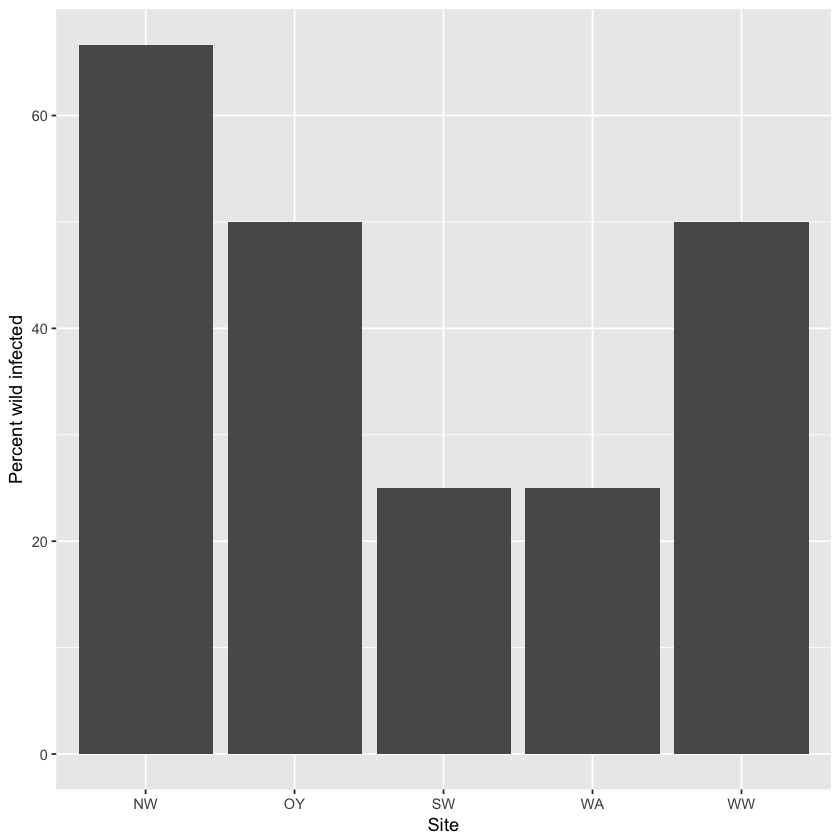

In [61]:
ggplot(prevalencef, aes(x = Site, y = RFTM_score)) +
        geom_bar(stat="identity", position="dodge")+ylab("Percent wild infected")

In [71]:
fInt=aggregate(fRFTM$RFTM_Score, by=fRFTM$Site, FUN=multi)

ERROR: Error in aggregate.data.frame(as.data.frame(x), ...): 'by' must be a list


In [ ]:
Dryweight$avg=Dryweight$Dry_weight[,1]
Dryweight$sd=Dryweight$Dry_weight[,2]
Dryweight=Dryweight[-4]

In [ ]:
ggplot(Dryweight, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [49]:
cvRFTM1=cvRFTM1[!cvRFTM1$Site=="WW",]
cvRFTM1=cvRFTM1[!cvRFTM1$Site=="SW",]

In [19]:
cvRFTM3=cvRFTM3[!cvRFTM3$Site=="WA",]

In [50]:
NROW(cvRFTM1)

[1] 109

Send an excel sheet of ones we want to process. 

In [53]:
cvRFTM1$TotalDensity_s=scale(cvRFTM1$TotalDensity)
cvRFTM1$PerCV_s=scale(cvRFTM1$PerCV)

In [20]:
cvRFTM3$TotalDensity_s=scale(cvRFTM3$TotalDensity)
cvRFTM3$PerCV_s=scale(cvRFTM3$PerCV)

In [214]:
#cvRFTM1$TotalDensity=as.factor(cvRFTM1$TotalDensity)

In [196]:
#cvRFTM1$PerCV=as.factor(cvRFTM1$PerCV)

## Prevalence
glmm (logistic regression) of prevalence with site as random effect

In [54]:
prev1=glmer(RFTM_prev~TotalDensity_s*PerCV_s+(1|Site/Color/Number), data=cvRFTM1, family = binomial(link = "logit"))

In [55]:
Anova(prev1, Type="3")

,Chisq,Df,Pr(>Chisq)
TotalDensity_s,1.0438386,1,0.30693039
PerCV_s,5.6254193,1,0.01770183
TotalDensity_s:PerCV_s,0.6852089,1,0.40779881


In [21]:
prev3=glmer(RFTM_prev~TotalDensity_s*PerCV_s+(1|Site/Color/Number), data=cvRFTM3, family = binomial(link = "logit"))

In [22]:
Anova(prev3, Type="3")

,Chisq,Df,Pr(>Chisq)
TotalDensity_s,0.05400704,1,0.8162319
PerCV_s,1.89605721,1,0.1685203
TotalDensity_s:PerCV_s,0.60447072,1,0.4368773


Site as fixed effect, dont know if htis is really legitimate?

In [241]:
prev2=glmer(RFTM_prev~TotalDensity*PerCV*Site+(1|Color/Number), data=cvRFTM1, family = binomial(link = "logit"))

In [242]:
Anova(prev2, Type="III")

,Chisq,Df,Pr(>Chisq)
TotalDensity,0.1110139,1,0.738992743
PerCV,1.5434161,1,0.214110039
Site,0.7495102,2,0.687457613
TotalDensity:PerCV,0.1486687,1,0.699810809
TotalDensity:Site,9.7868512,2,0.007495701
PerCV:Site,6.7254642,2,0.034640488
TotalDensity:PerCV:Site,0.5439780,2,0.761862645


In [46]:
table(cvRFTM1$RFTM_prev,  cvRFTM1$PerCV, cvRFTM1$Site)

, ,  = NW

   
    33.3333333333333 37.5 40 41.6666666666667 42.8571428571429 45.4545454545455
  0                2    0  0                3                0                0
  1                1    0  0                0                4                0
   
    46.1538461538462 50 54.5454545454545 100
  0                3  1                0  15
  1                0  1                0  30

, ,  = OY

   
    33.3333333333333 37.5 40 41.6666666666667 42.8571428571429 45.4545454545455
  0                0    2  0                0                0                0
  1                0    0  0                0                0                0
   
    46.1538461538462 50 54.5454545454545 100
  0                3  5                1  12
  1                0  5                2  19

, ,  = SW

   
    33.3333333333333 37.5 40 41.6666666666667 42.8571428571429 45.4545454545455
  0                0    0  2                0                2                1
  1                0    2  1       

In [26]:
table(cvRFTM3$RFTM_prev,  cvRFTM3$PerCV, cvRFTM3$Site)

, ,  = NW

   
    27.2727272727273 33.3333333333333 37.5 38.4615384615385 40 41.6666666666667
  0                0                3    0                0  0                3
  1                0                2    0                0  0                0
   
    42.8571428571429 45.4545454545455 46.1538461538462 50 54.5454545454545 100
  0                0                0                3  1                0  18
  1                4                0                0  1                0  30

, ,  = OY

   
    27.2727272727273 33.3333333333333 37.5 38.4615384615385 40 41.6666666666667
  0                0                0    2                0  0                0
  1                0                0    0                0  0                0
   
    42.8571428571429 45.4545454545455 46.1538461538462 50 54.5454545454545 100
  0                0                0                3  5                1  13
  1                0                0                0  5                2  21

, ,  =

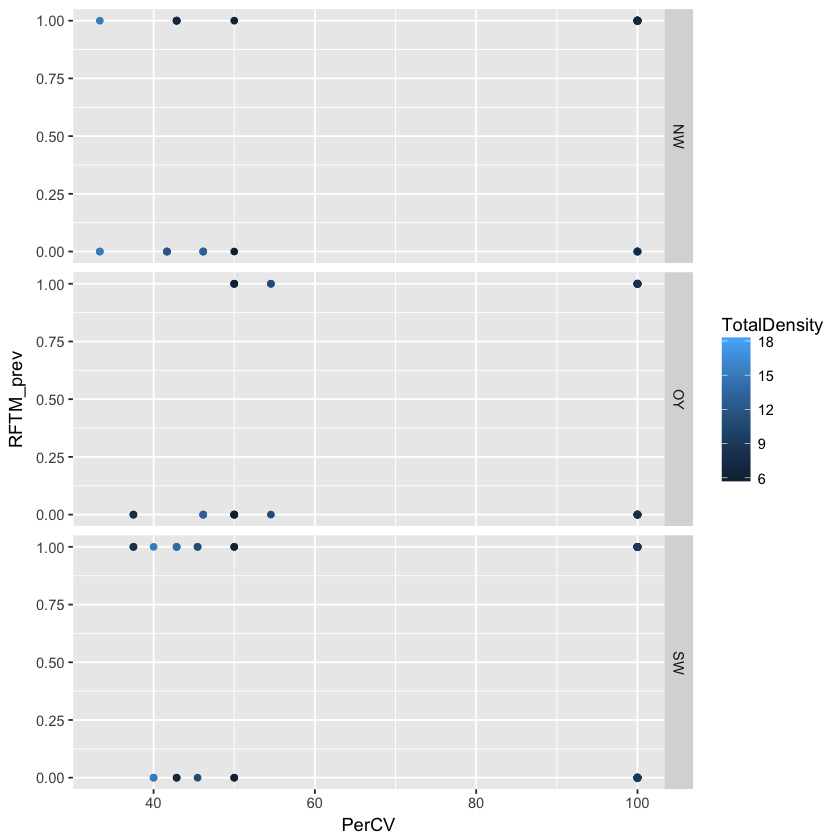

In [43]:
ggplot(cvRFTM1, aes(x=PerCV, y=RFTM_prev)) + facet_grid(Site~.)+geom_point(aes(color=TotalDensity))

In [22]:
prevalence=with(cvRFTM1, tapply(RFTM_score, list(Treatment, TotalDensity, PerCV, Site, Color),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalence=na.omit(as.data.frame.table(prevalence, response=RFTM_score))
colnames(prevalence)=c("Treatment", "TotalDensity", "PerCV", "Site", "Color", "RFTM_score")

In [23]:
prevalence[c(2,3,6)]=apply(prevalence[c(2,3,6)], 2, as.character)                          
prevalence[c(2,3,6)]=apply(prevalence[c(2,3,6)], 2, as.numeric) 

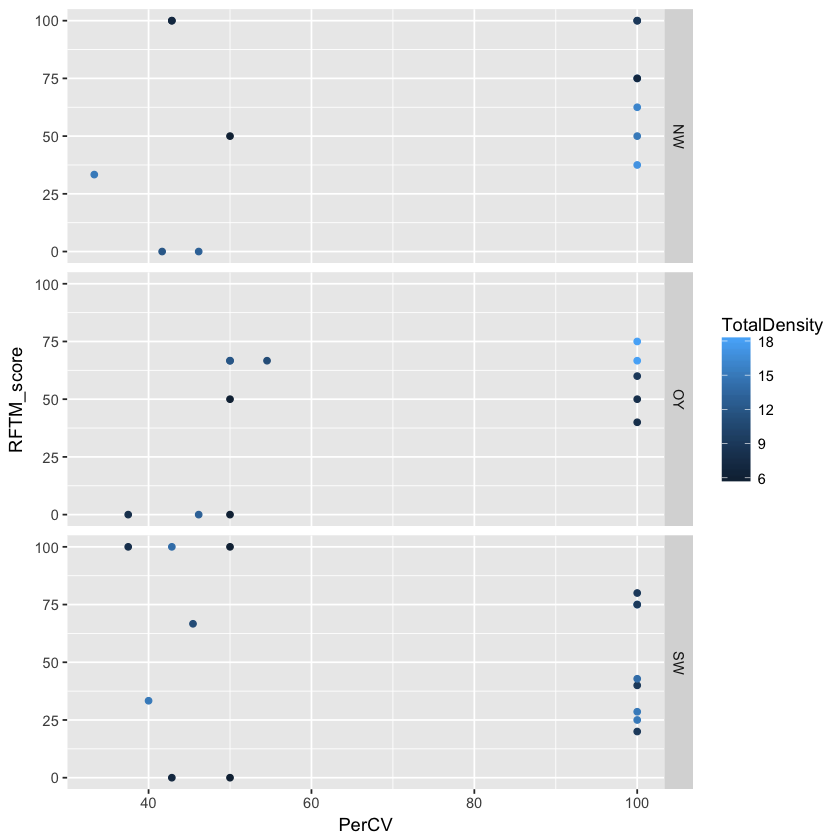

In [243]:
ggplot(prevalence, aes(x=PerCV, y=RFTM_score)) + facet_grid(Site~.)+geom_point(aes(color=TotalDensity))

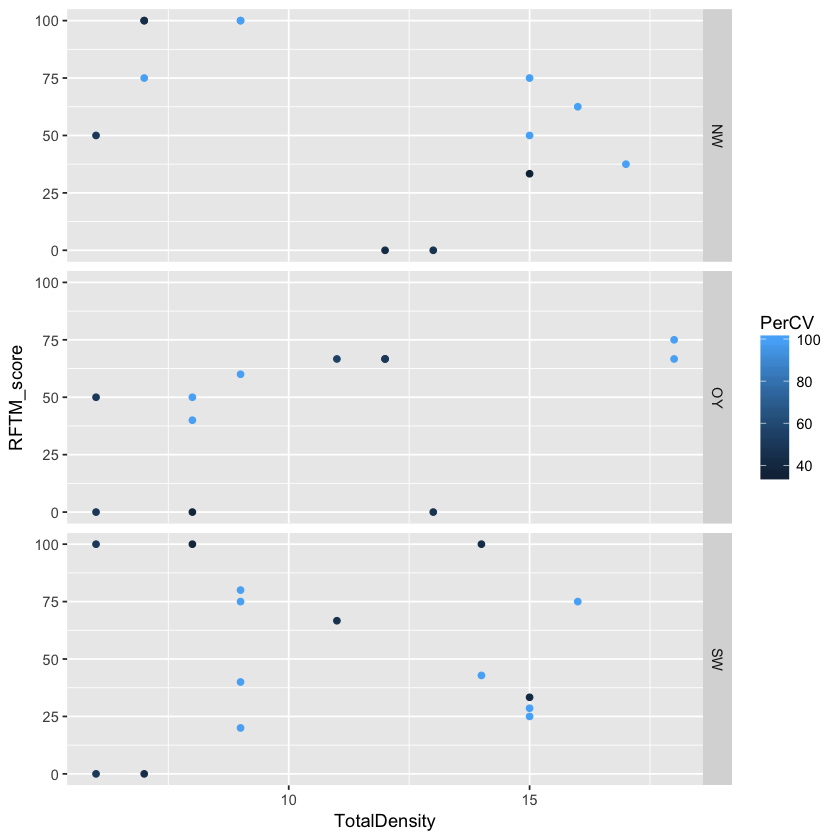

In [244]:
ggplot(prevalence, aes(x=TotalDensity, y=RFTM_score)) + facet_grid(Site~.)+ geom_point(aes(color=PerCV))

## intensity of infected oysters
Can you also do intensity notjust excluding 

In [37]:
cvInt=cvRFTM1[cvRFTM1$RFTM_score>0 & !is.na(cvRFTM1$RFTM_score),]

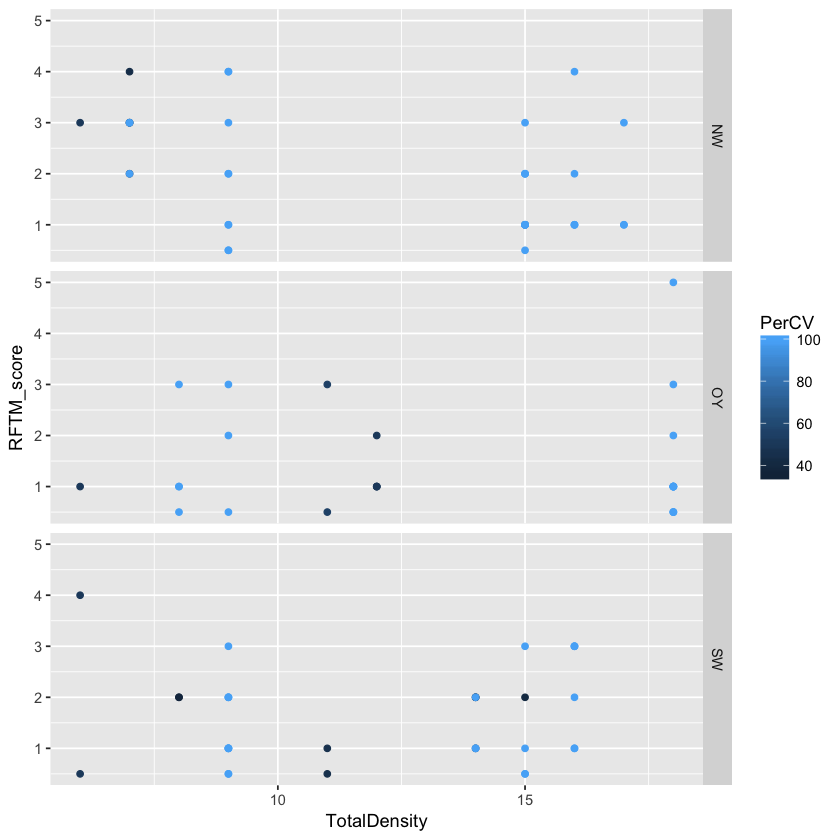

In [38]:
ggplot(cvInt, aes(x=TotalDensity, y=RFTM_score)) + facet_grid(Site~.)+ geom_point(aes(color=PerCV))

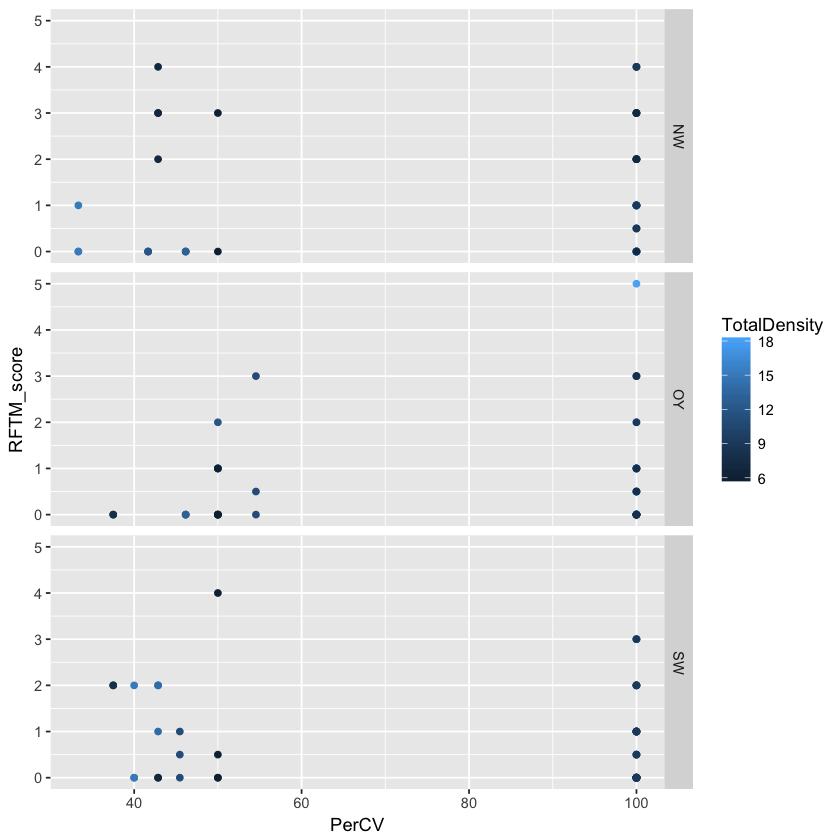

In [39]:
ggplot(cvRFTM1, aes(x=PerCV, y=RFTM_score)) + facet_grid(Site~.)+ geom_point(aes(color=TotalDensity))

## Plots of weight by treatment, need to change these to continous variables?

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

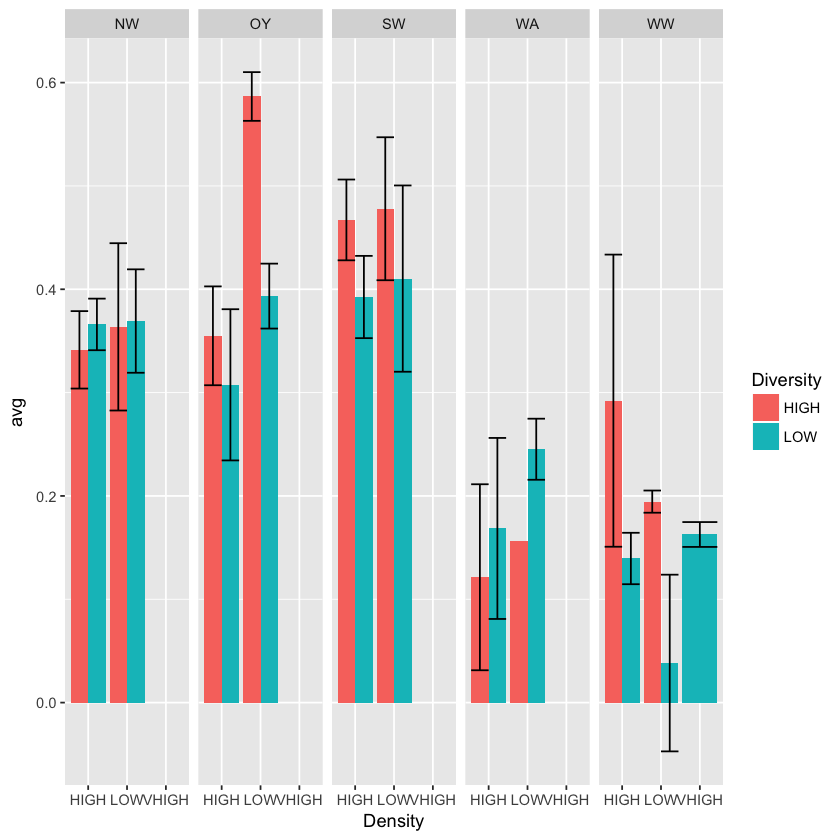

In [34]:
Dryweight=aggregate(Dry_weight~Density+Diversity+Site, data=cv, FUN=multi)
Dryweight$avg=Dryweight$Dry_weight[,1]
Dryweight$sd=Dryweight$Dry_weight[,2]
Dryweight=Dryweight[-4]
ggplot(Dryweight, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [132]:
#ggplot(cv, aes(x = Density, y = Dry_weight, fill=Diversity)) + geom_boxplot() + facet_grid( ~Site)

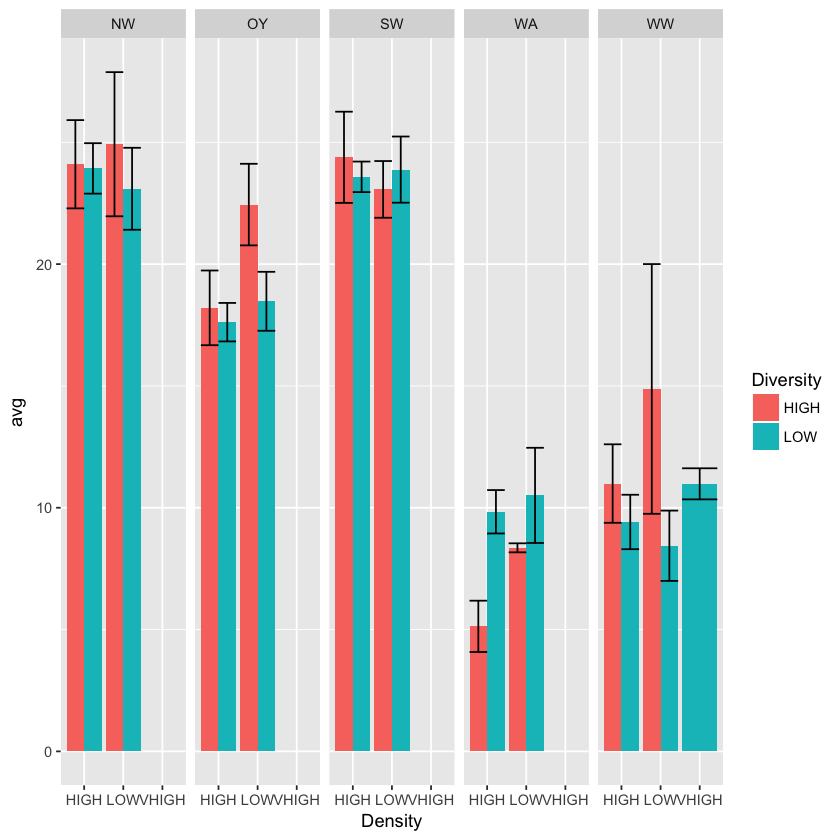

In [133]:
#ggplot(cv, aes(x = Density, y = Weight_post, fill=Diversity)) +geom_boxplot() + facet_grid( ~Site)

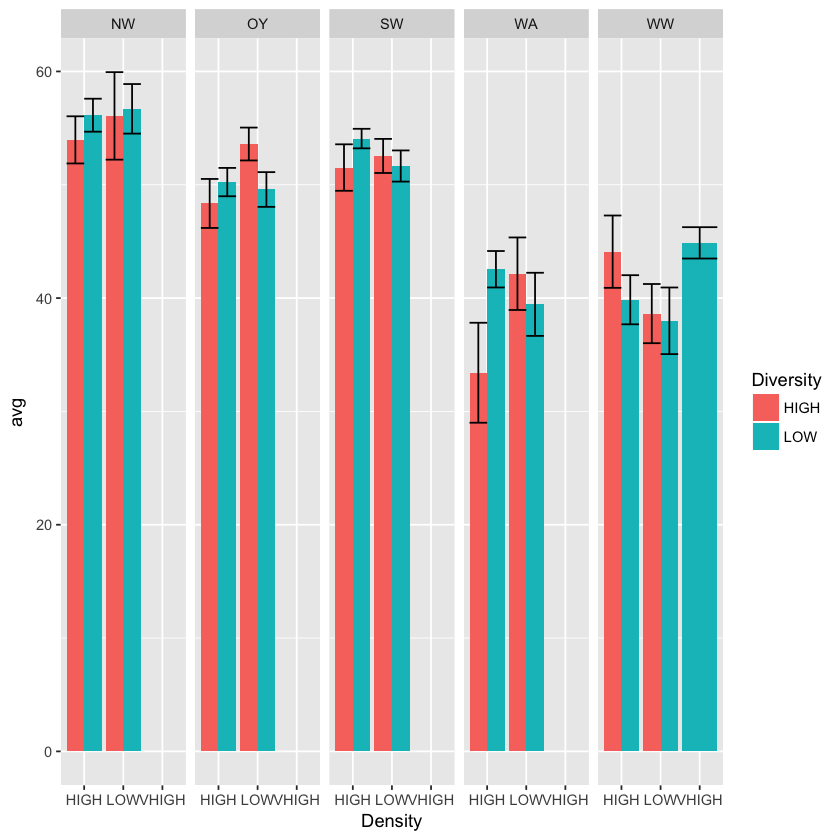

In [36]:
Lengthpost=aggregate(Length_post~Density+Diversity+Site, data=cv, FUN=multi)
Lengthpost$avg=Lengthpost$Length_post[,1]
Lengthpost$sd=Lengthpost$Length_post[,2]
Lengthpost=Lengthpost[-4]
ggplot(Lengthpost, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [137]:
#ggplot(cv, aes(x = Density, y = Length_post, fill=Diversity)) +geom_boxplot() + facet_grid( ~Site)

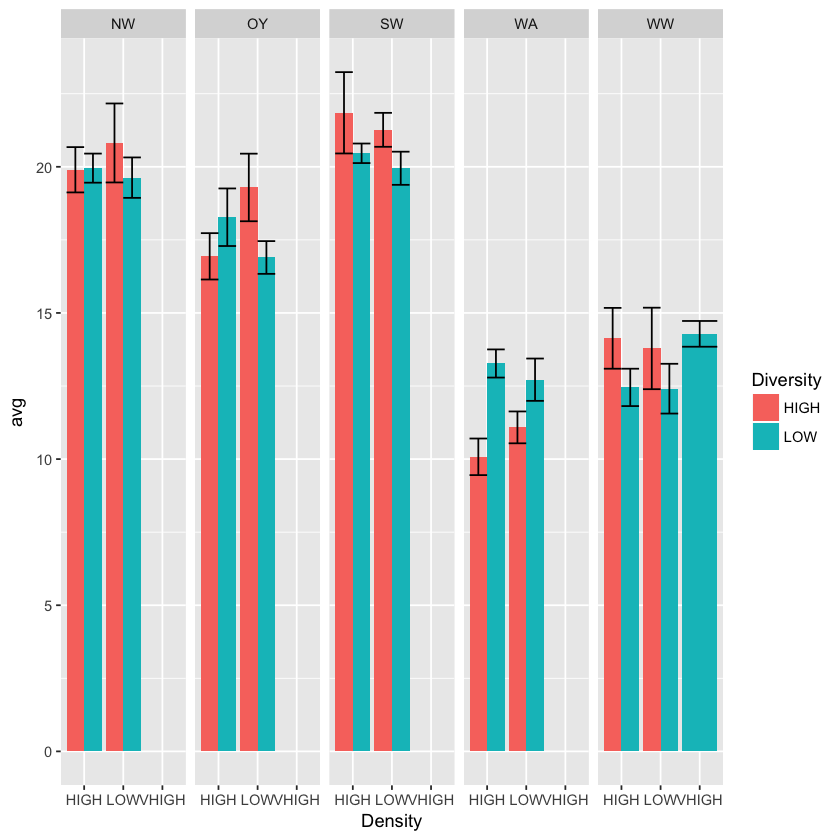

In [37]:
Heightpost=aggregate(Height_post~Density+Diversity+Site, data=cv, FUN=multi)
Heightpost$avg=Heightpost$Height_post[,1]
Heightpost$sd=Heightpost$Height_post[,2]
Heightpost=Heightpost[-4]
ggplot(Heightpost, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [139]:
#ggplot(cv, aes(x = Density, y = Height_post, fill=Diversity)) +       geom_boxplot() + facet_grid( ~Site)

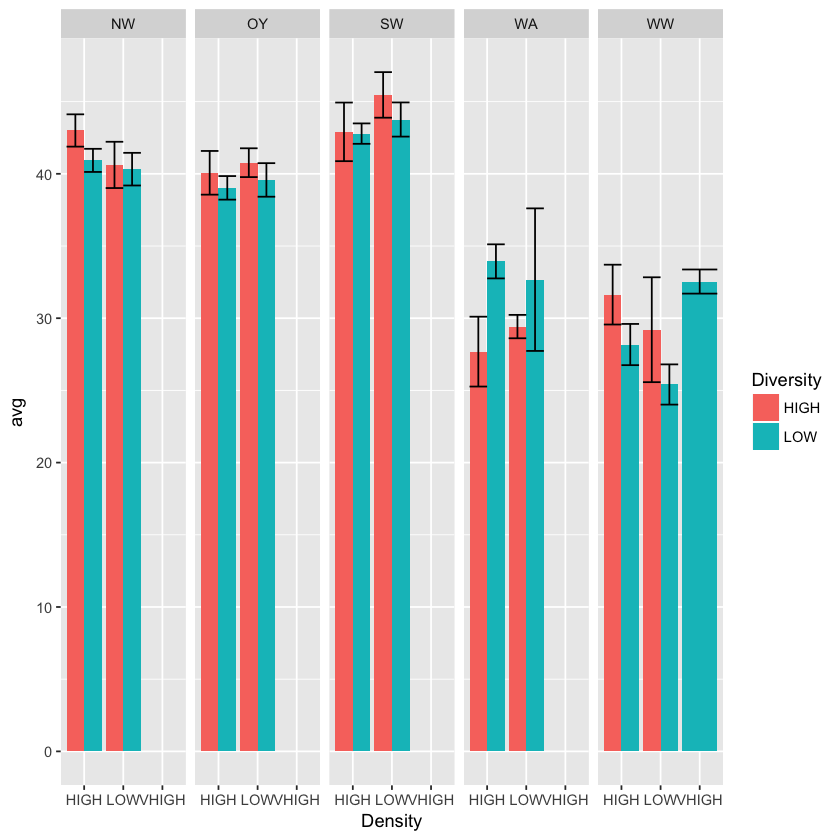

In [38]:
Widthpost=aggregate(Width_post~Density+Diversity+Site, data=cv, FUN=multi)
Widthpost$avg=Widthpost$Width_post[,1]
Widthpost$sd=Widthpost$Width_post[,2]
Widthpost=Widthpost[-4]
ggplot(Widthpost, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

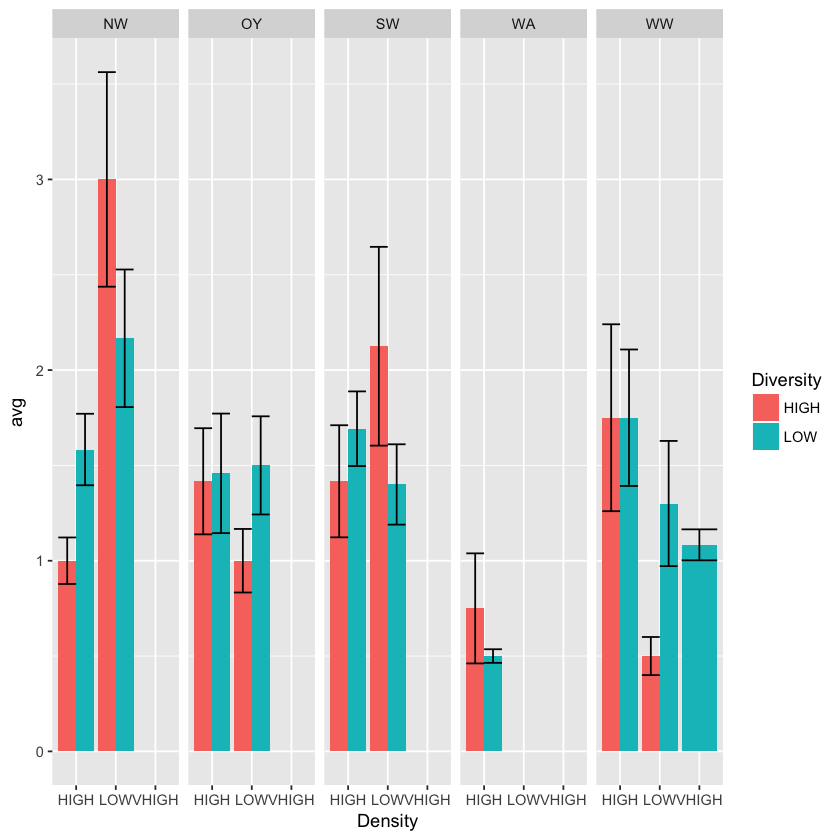

In [39]:
intensity=aggregate(RFTM_score~Density+Diversity+Site, data=cv, FUN=multi.int)
intensity$avg=intensity$RFTM_score[,1]
intensity$sd=intensity$RFTM_score[,2]
intensity=intensity[-4]
ggplot(intensity, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [15]:
colnames(cv)

[1] "Date_pre"         "Date_post"        "Site"             "Density"         
 [5] "Diversity"        "Color"            "Number"           "Species"         
 [9] "Length_pre"       "Width_pre"        "Height_pre"       "Weight_pre"      
[13] "Notes_pre"        "POST_DEAD_ALIVE"  "Length_post"      "Width_post"      
[17] "Height_post"      "Weight_post"      "Genetics_Weight"  "Dry_Weight_plate"
[21] "Dry_weight_final" "Dry_weight_shell" "RFTM_date"        "RFTM_score"      
[25] "peacrabs"         "Notes_post"       "LiveMM"           "Height_change"   
[29] "Weight_change"    "Length_change"    "Width_change"     "Dry_weight"

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

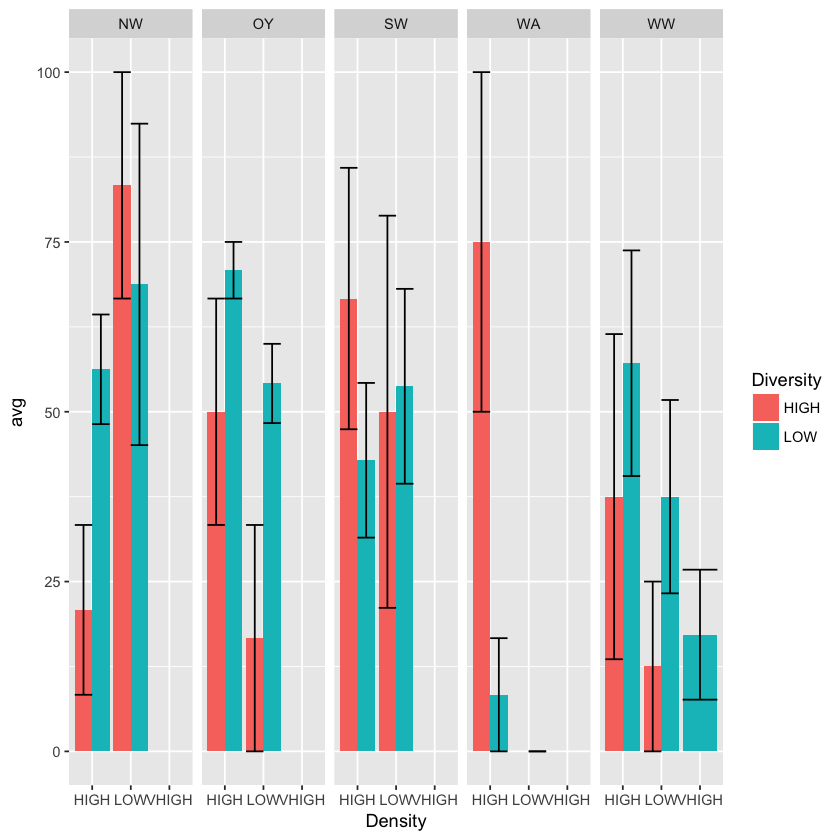

In [43]:
prevalence=aggregate(RFTM_score~Density+Diversity+Site, data=prevalence, FUN=multi)
prevalence$avg=prevalence$RFTM_score[,1]
prevalence$sd=prevalence$RFTM_score[,2]
prevalence=prevalence[-4]
ggplot(prevalence, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

Warning message:
“Removed 9 rows containing missing values (geom_bar).”

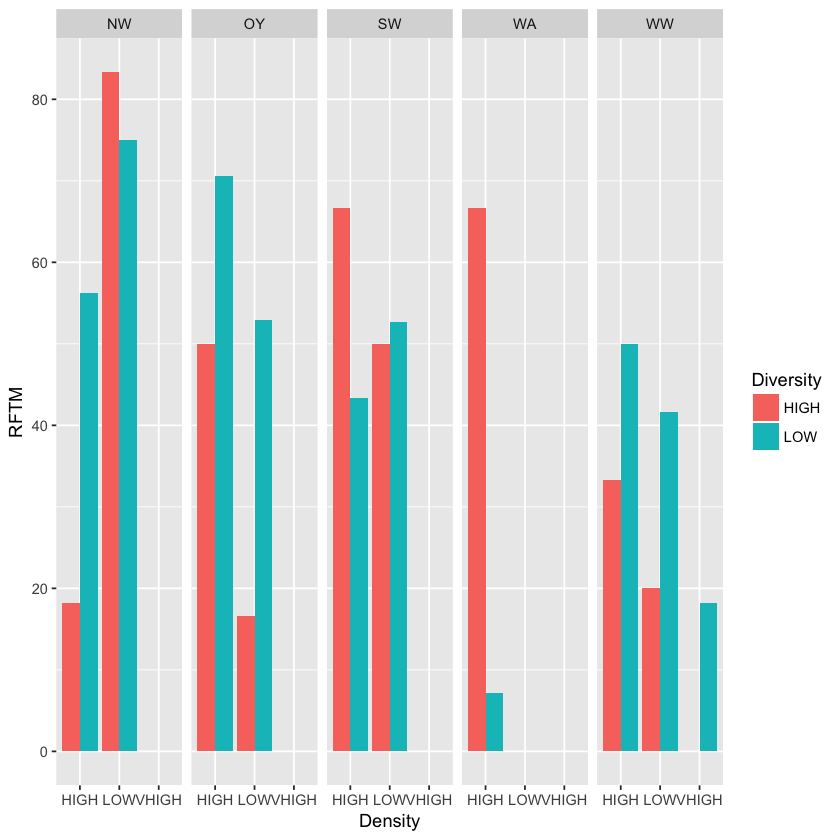

In [128]:
ggplot(prevalence, aes(x = Density, y = RFTM, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)

In [107]:
clams=with(cv, tapply(cv$LiveMM, list( Density, Diversity, Site),  mean, na.rm=TRUE))

In [109]:
clams=as.data.frame.table(clams, response=LiveMM)

In [110]:
colnames(clams)=c("Density", "Diversity", "Site", "Clams")

Warning message:
“Removed 9 rows containing missing values (geom_bar).”

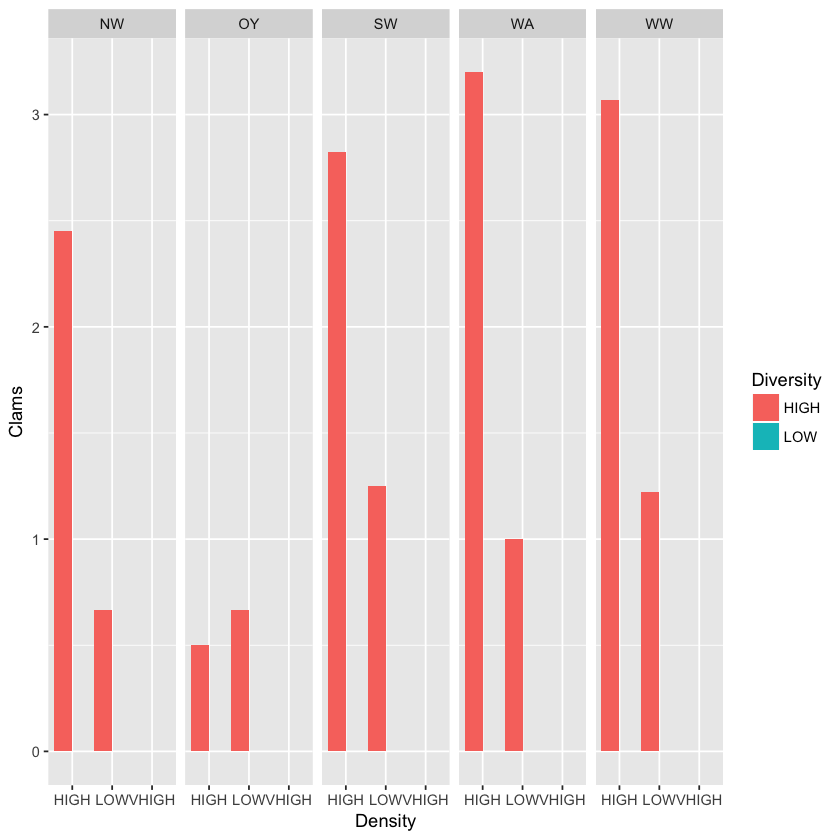

In [111]:
ggplot(clams, aes(x = Density, y = Clams, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)

In [ ]:
High diversity, number of clams, intensity and prevalence. 

In [146]:
cvh=cv[cv$Diversity=="HIGH",]

In [149]:
clams_prevalence=with(cvh, tapply(RFTM_score, list( LiveMM, Density, Site),  function(x) sum(x>0, na.rm=TRUE)/sum(!is.na(x))))

In [150]:
clams_prevalence=as.data.frame.table(clams_prevalence)
colnames(clams_prevalence)=c("Clams", "Density", "Site", "RFTM")

Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Removed 66 rows containing missing values (geom_point).”

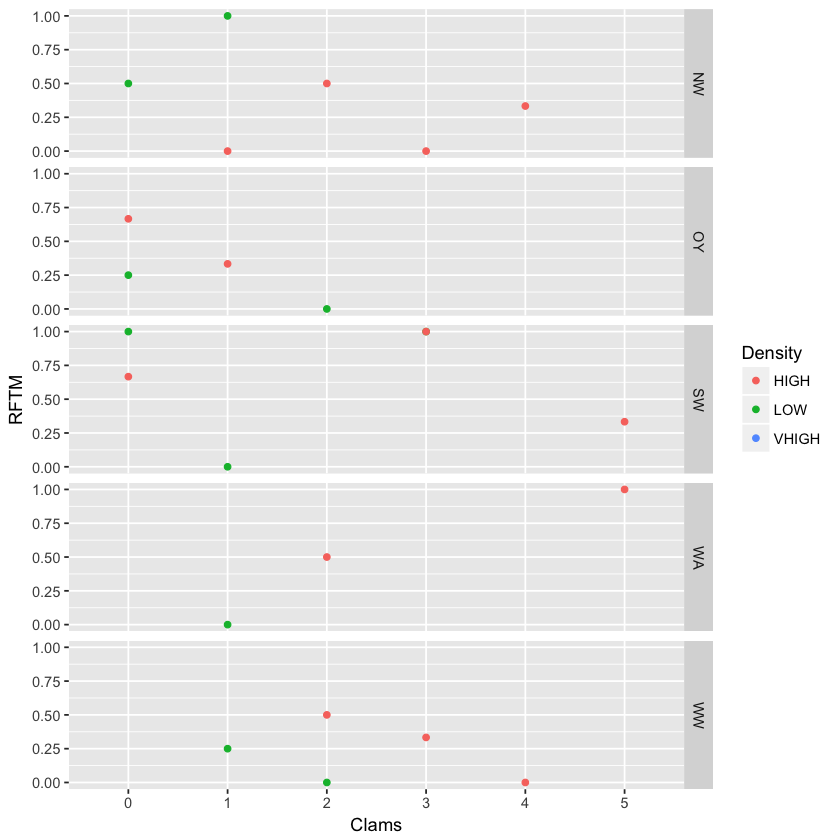

In [152]:
ggplot(clams_prevalence, aes(x = Clams, y = RFTM, colour=Density)) +
        geom_point(stat="identity", position="dodge")+facet_grid(Site~.)

In [153]:
clams_intensity=with(cvh, tapply(RFTM_score, list( LiveMM, Density,  Site),  function(x) mean(x[x!=0], na.rm=TRUE)))

In [154]:
clams_intensity=as.data.frame.table(clams_intensity)
colnames(clams_intensity)=c("Clams", "Density", "Site", "RFTM")

Warning message:
“Removed 5 rows containing missing values (geom_bar).”Warning message:
“Removed 6 rows containing missing values (geom_errorbar).”

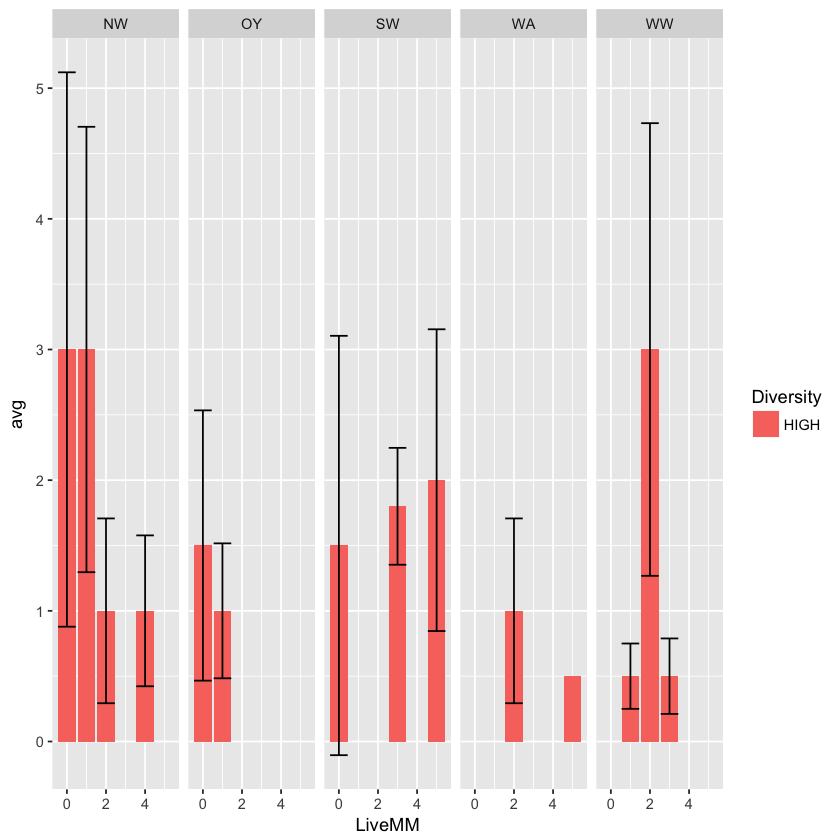

In [147]:
clams_intensity=aggregate(RFTM_score~LiveMM+Diversity+Site, data=cvh, FUN=multi.int)
clams_intensity$avg=clams_intensity$RFTM_score[,1]
clams_intensity$sd=clams_intensity$RFTM_score[,2]
clams_intensity=clams_intensity[-4]
ggplot(clams_intensity, aes(x = LiveMM, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [144]:
print(clams_intensity)

   LiveMM Diversity Site      avg        sd
1       0      HIGH   NW 3.000000 2.1213203
2       1      HIGH   NW 3.000000 1.7043362
3       2      HIGH   NW 1.000000 0.7071068
4       3      HIGH   NW      NaN 0.0000000
5       4      HIGH   NW 1.000000 0.5773503
6       0       LOW   NW 1.816667 1.2365858
7       0      HIGH   OY 1.500000 1.0341395
8       1      HIGH   OY 1.000000 0.5163978
9       2      HIGH   OY      NaN 0.0000000
10      0       LOW   OY 1.476190 1.1707974
11      0      HIGH   SW 1.500000 1.6046807
12      1      HIGH   SW      NaN 0.0000000
13      3      HIGH   SW 1.800000 0.4472136
14      5      HIGH   SW 2.000000 1.1547005
15      0       LOW   SW 1.565217 1.0057234
16      1      HIGH   WA      NaN        NA
17      2      HIGH   WA 1.000000 0.7071068
18      5      HIGH   WA 0.500000        NA
19      0       LOW   WA 0.500000 0.1178511
20      1      HIGH   WW 0.500000 0.2500000
21      2      HIGH   WW 3.000000 1.7320508
22      3      HIGH   WW 0.50000

Warning message:
“Removed 73 rows containing missing values (geom_point).”

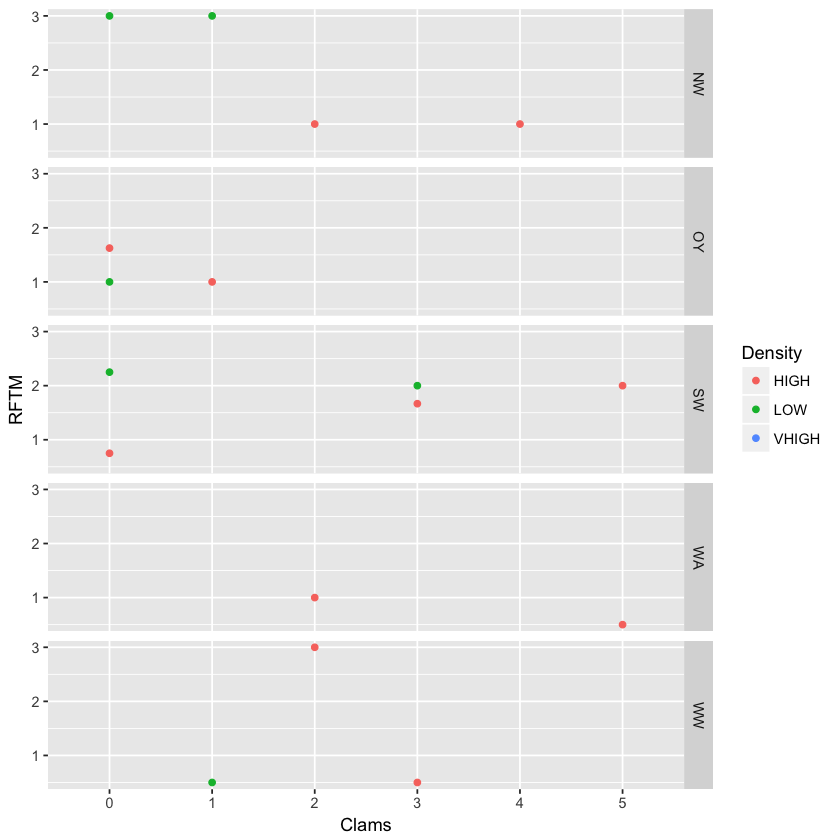

In [156]:
ggplot(clams_intensity, aes(x = Clams, y = RFTM, colour=Density)) +
        geom_point()+facet_grid(Site~.)

Effect of infection on size/weight?